In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Lead_df = pd.read_csv("Leads.csv")
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
Lead_df.shape

(9240, 37)

In [4]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
Lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
Lead_df.columns = Lead_df.columns.str.replace(' ',"_").str.lower()
Lead_df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

# Data Cleaning

In [8]:
# Replacing the "Select"  category with Null Values

In [9]:
Lead_df = Lead_df.replace('Select', np.nan)

In [10]:
Lead_df.isnull().sum()  

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   3380
how_did_you_hear_about_x_education               7250
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

In [11]:
#Finding the null percentage

In [12]:
round(Lead_df.isnull().sum()/len(Lead_df.index),2)*100

prospect_id                                       0.0
lead_number                                       0.0
lead_origin                                       0.0
lead_source                                       0.0
do_not_email                                      0.0
do_not_call                                       0.0
converted                                         0.0
totalvisits                                       1.0
total_time_spent_on_website                       0.0
page_views_per_visit                              1.0
last_activity                                     1.0
country                                          27.0
specialization                                   37.0
how_did_you_hear_about_x_education               78.0
what_is_your_current_occupation                  29.0
what_matters_most_to_you_in_choosing_a_course    29.0
search                                            0.0
magazine                                          0.0
newspaper_article           

In [13]:
#Inference
#We can drop the columns which has mre than 40% missing columns

In [14]:
Lead_df = Lead_df.drop(columns=["how_did_you_hear_about_x_education", "lead_quality", "lead_profile", "asymmetrique_activity_index",
"asymmetrique_profile_index", "asymmetrique_activity_score","asymmetrique_profile_score"])

In [15]:
#Rechecking the percentage of missing values

In [16]:
round(Lead_df.isnull().sum()/len(Lead_df.index),2)*100

prospect_id                                       0.0
lead_number                                       0.0
lead_origin                                       0.0
lead_source                                       0.0
do_not_email                                      0.0
do_not_call                                       0.0
converted                                         0.0
totalvisits                                       1.0
total_time_spent_on_website                       0.0
page_views_per_visit                              1.0
last_activity                                     1.0
country                                          27.0
specialization                                   37.0
what_is_your_current_occupation                  29.0
what_matters_most_to_you_in_choosing_a_course    29.0
search                                            0.0
magazine                                          0.0
newspaper_article                                 0.0
x_education_forums          

In [17]:
#We see that we still have around 6 columns with high missing values. So lets treat observe these columns and see what can be done.

In [18]:
#1. Country: missing value 27%

Lead_df.country.value_counts(normalize=True)*100

country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switze

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

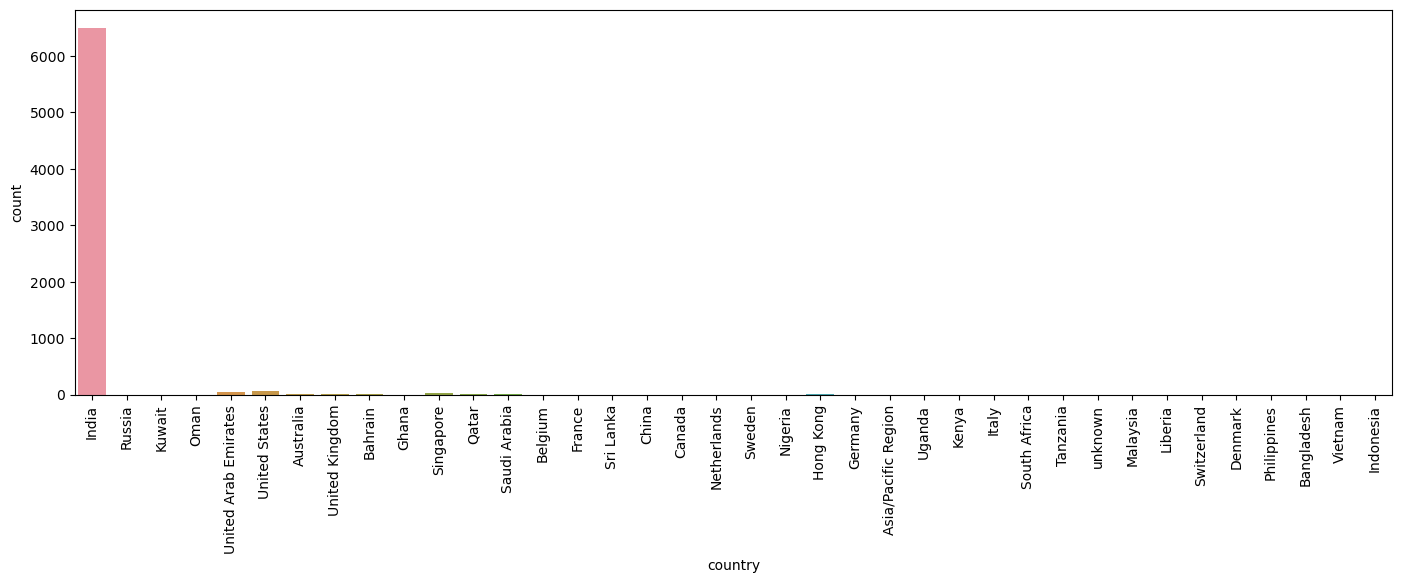

In [19]:
#Lets visualize this column

plt.figure(figsize = (17,5))
sns.countplot(Lead_df,x='country')
plt.xticks(rotation=90)

In [20]:
#The data looks highly skewed with column "India". However Country is an important column as this tell us where the lead is coming from. 
#Instead we can impute the coulm with "India" for all the Null Values.

In [21]:
Lead_df["country"] = Lead_df["country"].replace(np.nan, "India")

In [22]:
#2. specialization: missing value 37%

Lead_df.specialization.value_counts(normalize=True)*100

specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: proportion, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

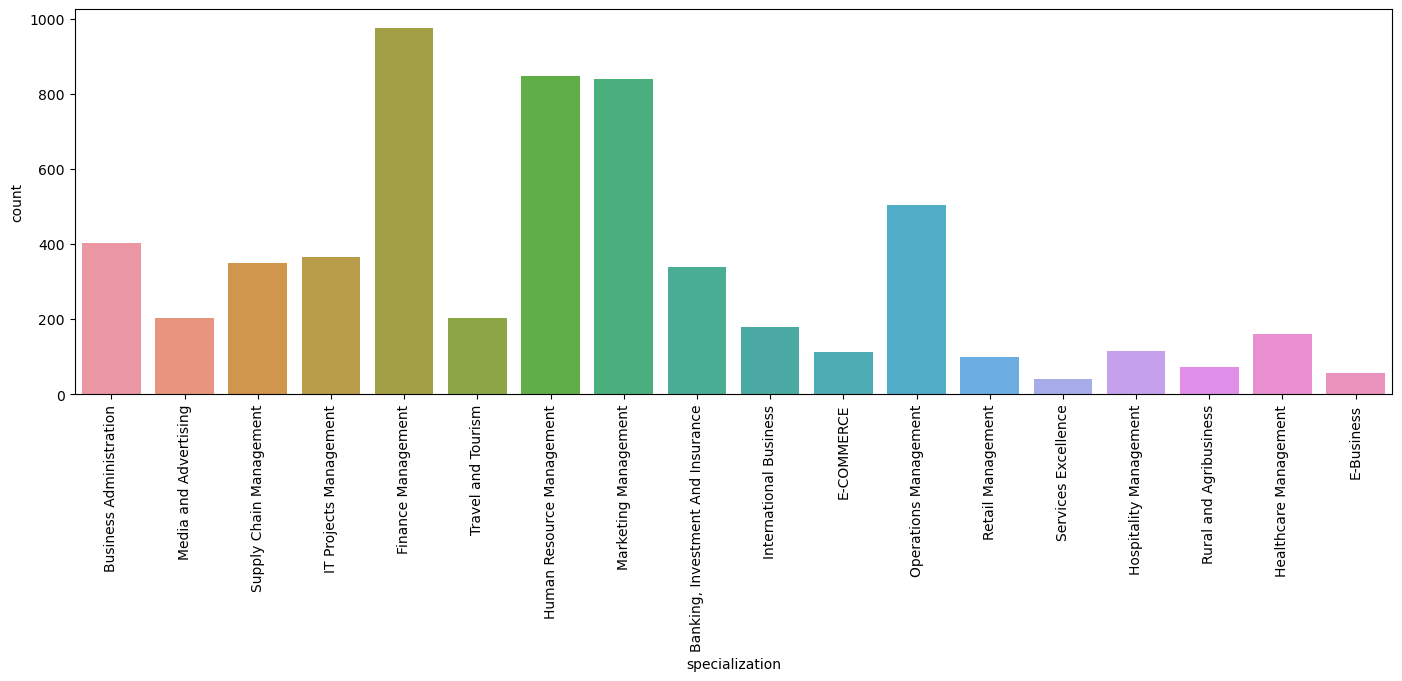

In [23]:
#Lets visualize this column

plt.figure(figsize = (17,5))
sns.countplot(Lead_df,x='specialization')
plt.xticks(rotation=90)

In [24]:
#There is a possibility that the lead might not have decided on the course yet. Hence lets fill it with others for now

In [25]:
Lead_df["specialization"] = Lead_df["specialization"].replace(np.nan, "Others")

In [26]:
#3. what_is_your_current_occupation: missing value 29%

Lead_df.what_is_your_current_occupation.value_counts(normalize=True)*100

what_is_your_current_occupation
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: proportion, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

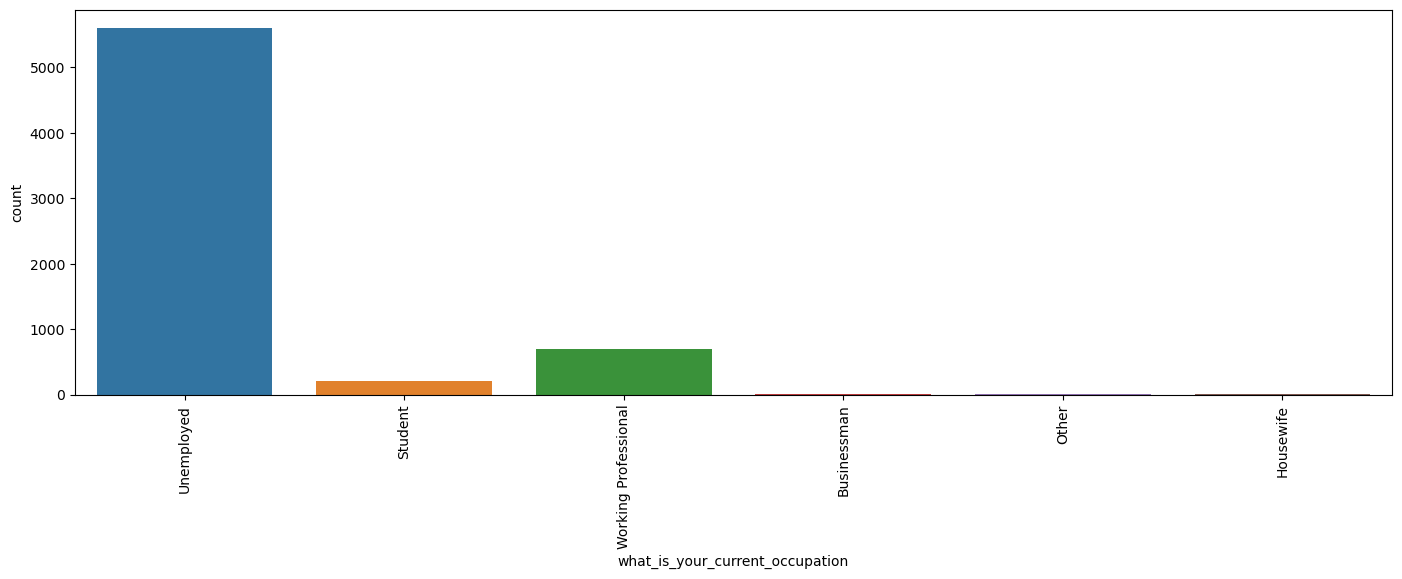

In [27]:
#Lets visualize this column

plt.figure(figsize = (17,5))
sns.countplot(Lead_df,x='what_is_your_current_occupation')
plt.xticks(rotation=90)

In [28]:
#Since majority is Unemployed we can impute the same data

In [29]:
Lead_df["what_is_your_current_occupation"] = Lead_df["what_is_your_current_occupation"].replace(np.nan, "Unemployed")

In [30]:
#4. what_matters_most_to_you_in_choosing_a_course: missing value 29%

Lead_df.what_matters_most_to_you_in_choosing_a_course.value_counts(normalize=True)*100

what_matters_most_to_you_in_choosing_a_course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

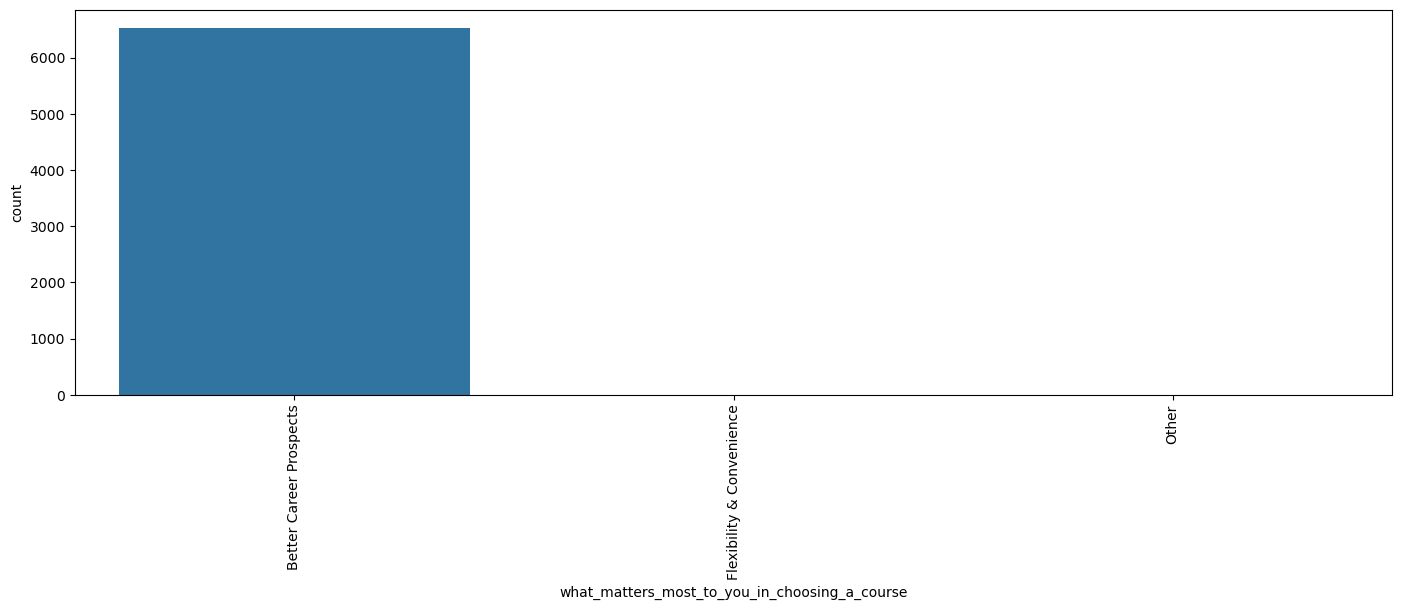

In [31]:
#Lets visualize this column

plt.figure(figsize = (17,5))
sns.countplot(Lead_df,x='what_matters_most_to_you_in_choosing_a_course')
plt.xticks(rotation=90)

In [32]:
#Since this column is highly skewed we need to drop this


In [33]:
Lead_df=Lead_df.drop('what_matters_most_to_you_in_choosing_a_course',axis=1)

In [34]:
#5. Tags: missing values 36%

Lead_df.tags.value_counts(normalize=True)*100

tags
Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                               

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

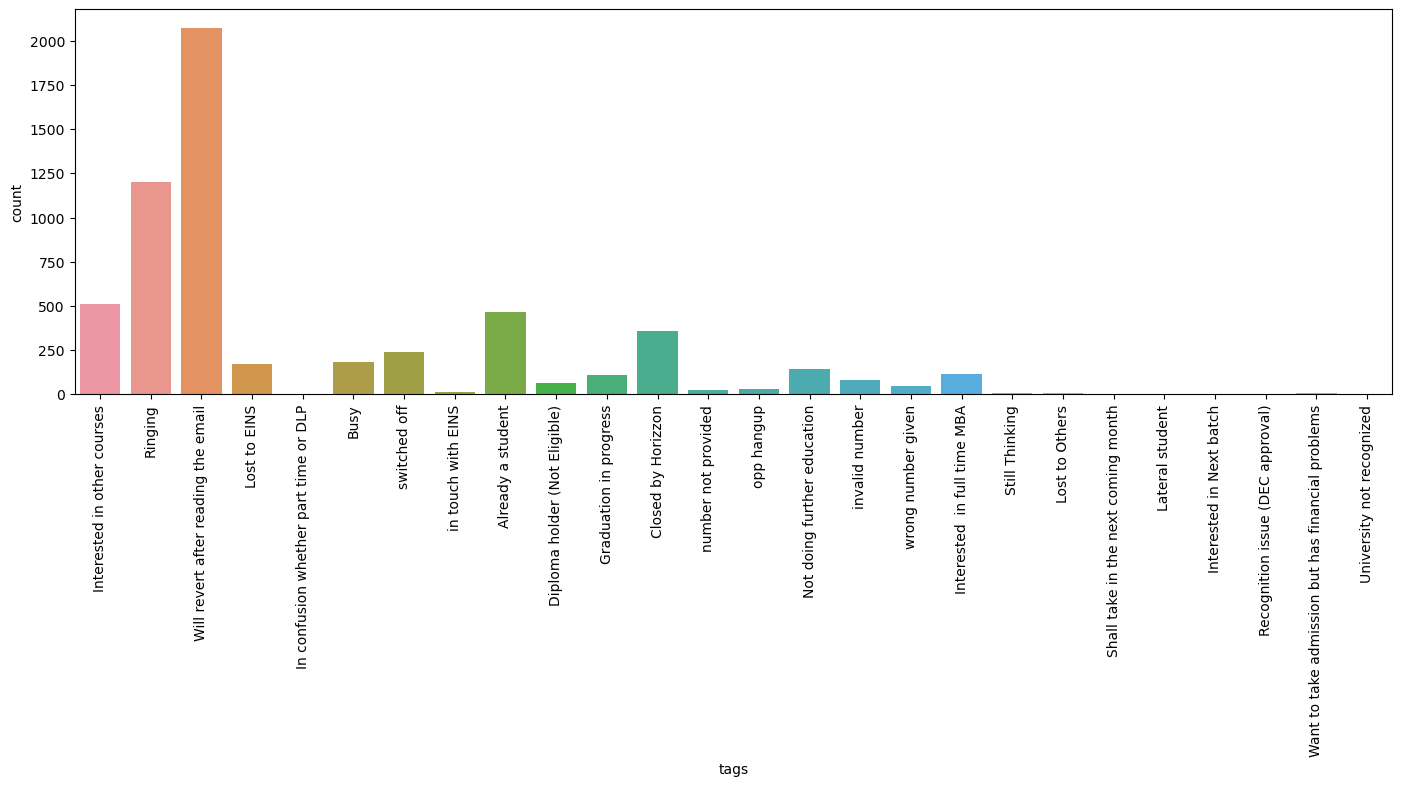

In [35]:
#Lets visualize this column

plt.figure(figsize = (17,5))
sns.countplot(Lead_df,x='tags')
plt.xticks(rotation=90)

In [36]:
#Since majority is Will revert after reading the email lets fill the values with the same

In [37]:
Lead_df["tags"] = Lead_df["tags"].replace(np.nan, "Will revert after reading the email")

In [38]:
#5. City: missing values 40%

Lead_df.city.value_counts(normalize=True)*100

city
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

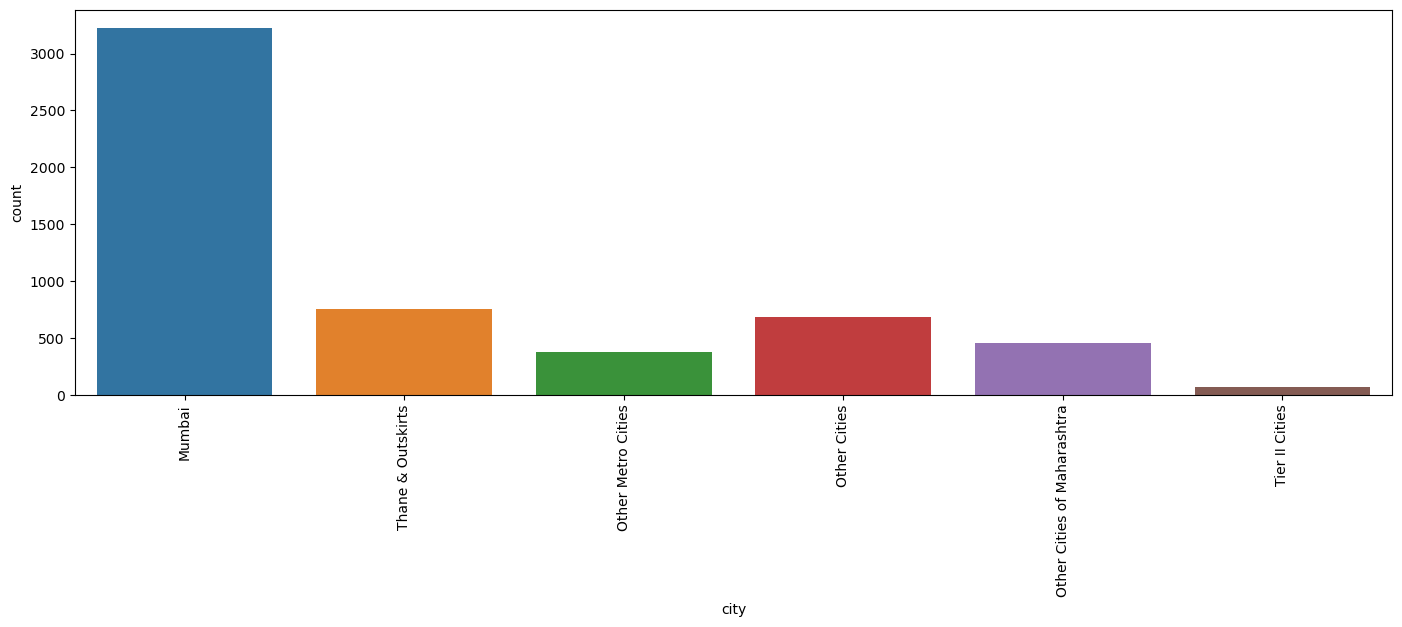

In [39]:
#Lets visualize this column

plt.figure(figsize = (17,5))
sns.countplot(Lead_df,x='city')
plt.xticks(rotation=90)

In [40]:
#Since majority is Mumbai lets fill the values with the same

In [41]:
Lead_df["city"] = Lead_df["city"].replace(np.nan, "Mumbai")

Treating Columns with less than 2% values

In [42]:
#Lets drop these columns

In [43]:
Lead_df.dropna(inplace=True)

In [44]:
#Checking the null percentage again
round(Lead_df.isnull().sum()/len(Lead_df.index),2)*100


prospect_id                                 0.0
lead_number                                 0.0
lead_origin                                 0.0
lead_source                                 0.0
do_not_email                                0.0
do_not_call                                 0.0
converted                                   0.0
totalvisits                                 0.0
total_time_spent_on_website                 0.0
page_views_per_visit                        0.0
last_activity                               0.0
country                                     0.0
specialization                              0.0
what_is_your_current_occupation             0.0
search                                      0.0
magazine                                    0.0
newspaper_article                           0.0
x_education_forums                          0.0
newspaper                                   0.0
digital_advertisement                       0.0
through_recommendations                 

In [45]:
#We don't have any more null values 
# let us see the percentage of the retained rows

(len(Lead_df.index)/9240)*100

98.2034632034632

Lets do the EDA now

In [46]:
#Checking for duplicates

Lead_df[Lead_df.duplicated()]

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,...,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,update_me_on_supply_chain_content,get_updates_on_dm_content,city,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity


#Univariate and Bivariate Analysis

In [47]:
#1. Convereted - the target variable

Converted = (sum(Lead_df['converted'])/len(Lead_df['converted'].index))*100
Converted

37.85541106458012

In [48]:
#This shows that we have 38% as lead conversion rate

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

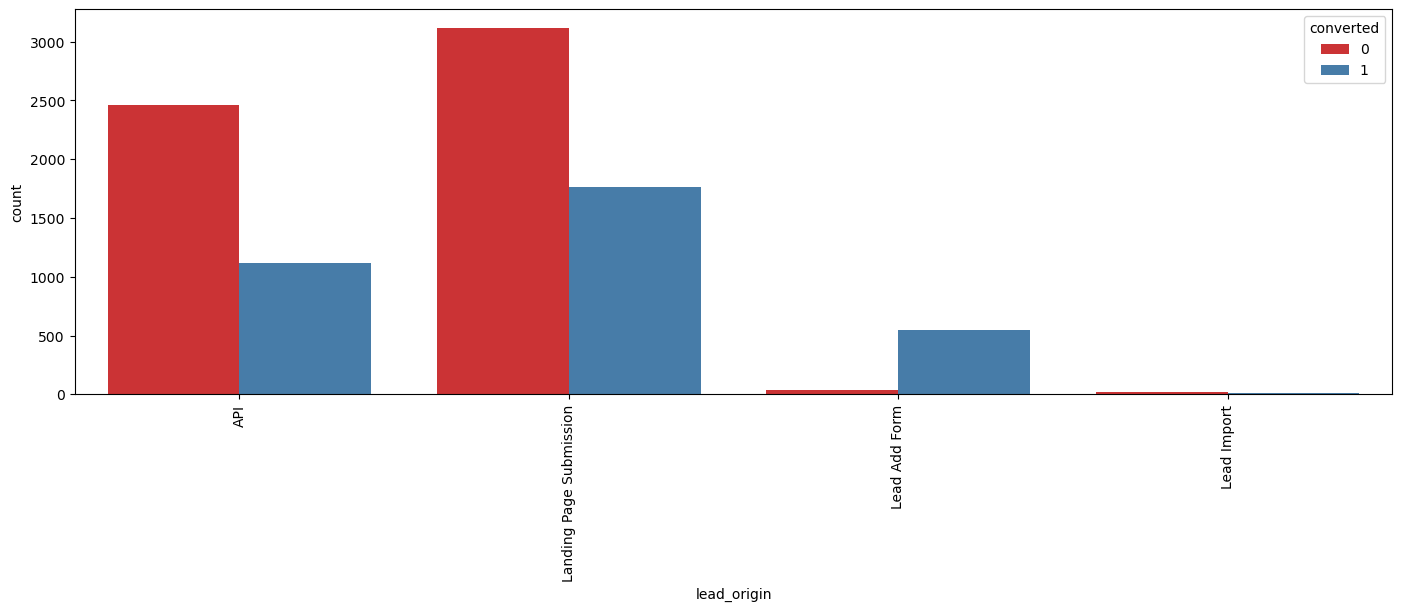

In [49]:
#2. Lead origin: Lets visialize this column

plt.figure(figsize = (17,5))
sns.countplot(x="lead_origin", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)



In [50]:
#Inferences
#1. Lead import is very less in number
#2. Lead Add Form has good conversion rate however lead count is comparetly less
#3. Landing Page Submission and API has good conversion rate but the lead originated fromthem are considerable.

#In order to improve the overall performance we need to work on Lead Add form and improve on lead conversion from Landing page and API.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

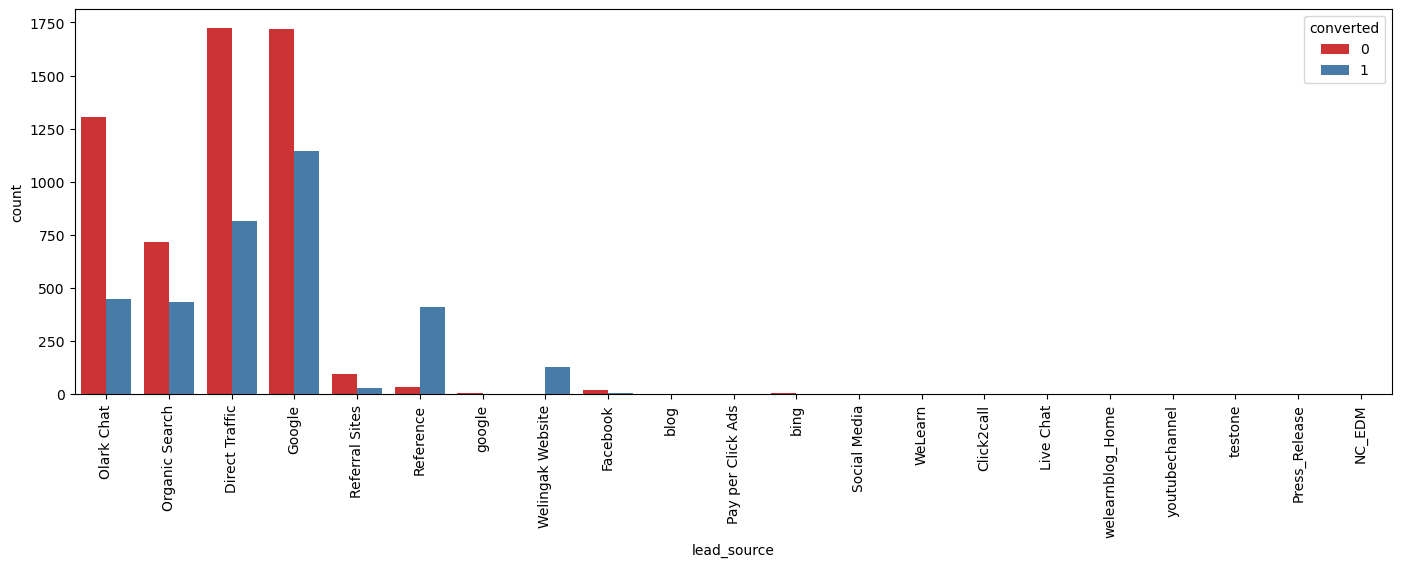

In [51]:
#3. Lead Source - Lets visialize this column

plt.figure(figsize = (17,5))
sns.countplot(x="lead_source", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)


In [52]:
#We need to make two changes here. Change google to Google and create a category Others for lead sources which do not have much values.


Lead_df["lead_source"] = Lead_df["lead_source"].replace(['google'], "Google")
Lead_df["lead_source"] = Lead_df["lead_source"].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'], "Others")



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

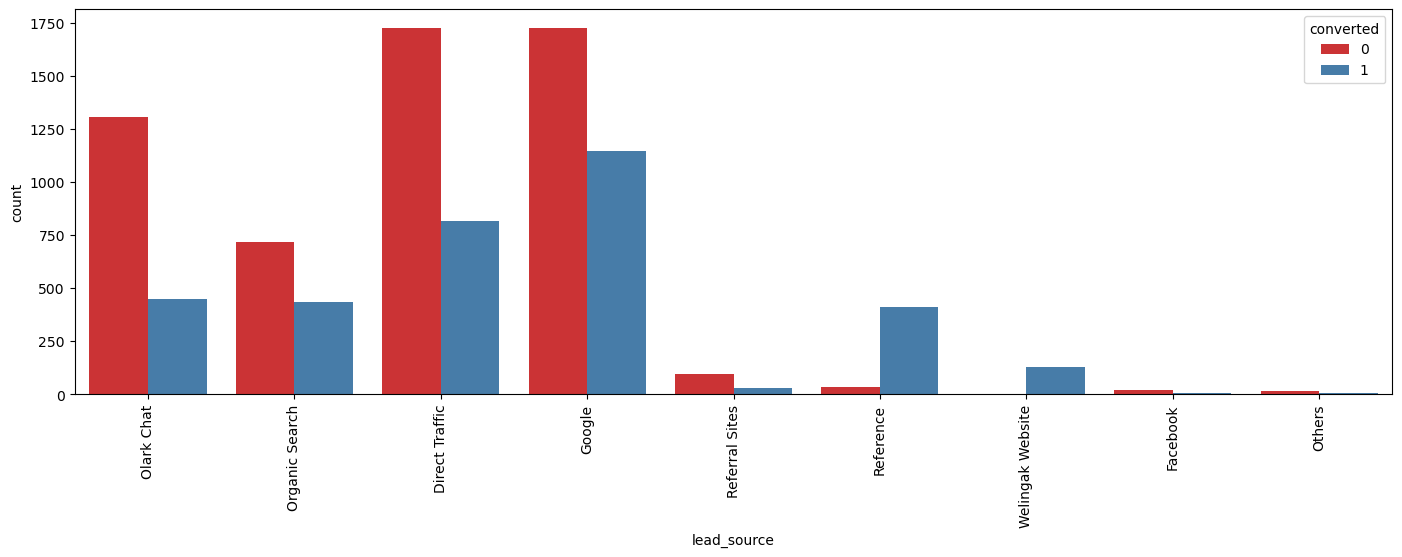

In [53]:
#Lets visualize it again

plt.figure(figsize = (17,5))
sns.countplot(x="lead_source", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [54]:
#Inference
#1. Google and Direct traffic are generating maximum number of leads
#2. Conversion through References and Welingaka Websites is high
#3. To improve overall performance conversion rate of Olark Chart, Organic Search Dorect Traffic and Google should be worked on. 
#4. Lead generation via Refernces ans Welingak Website should be increased.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

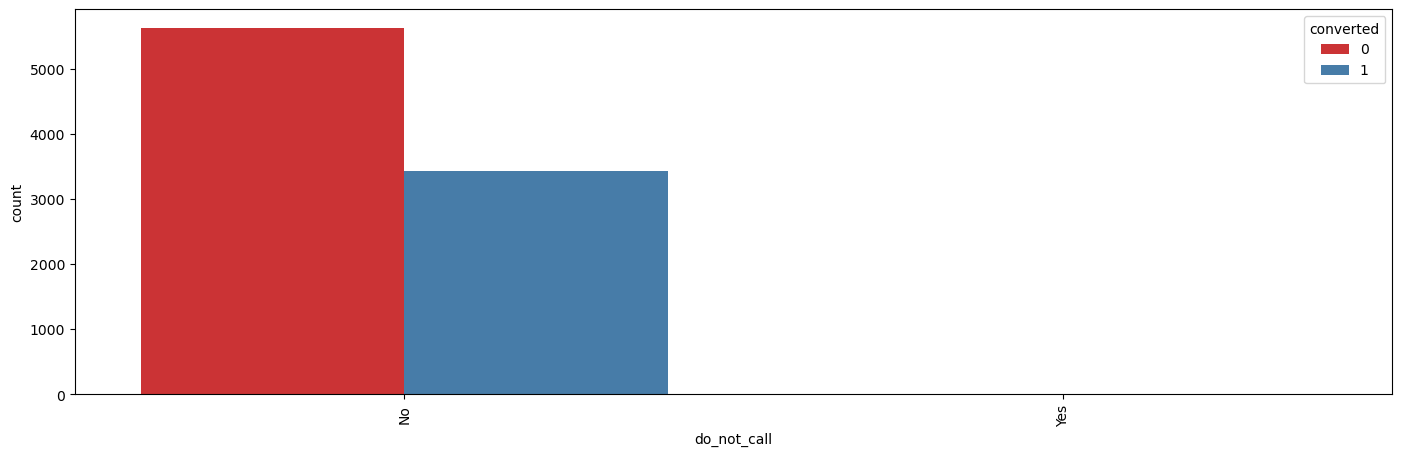

In [55]:
#4. Do Not call - lets visualize thsi column

plt.figure(figsize = (17,5))
sns.countplot(x="do_not_call", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [56]:
#Mostly it's a No so nothing much to see.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

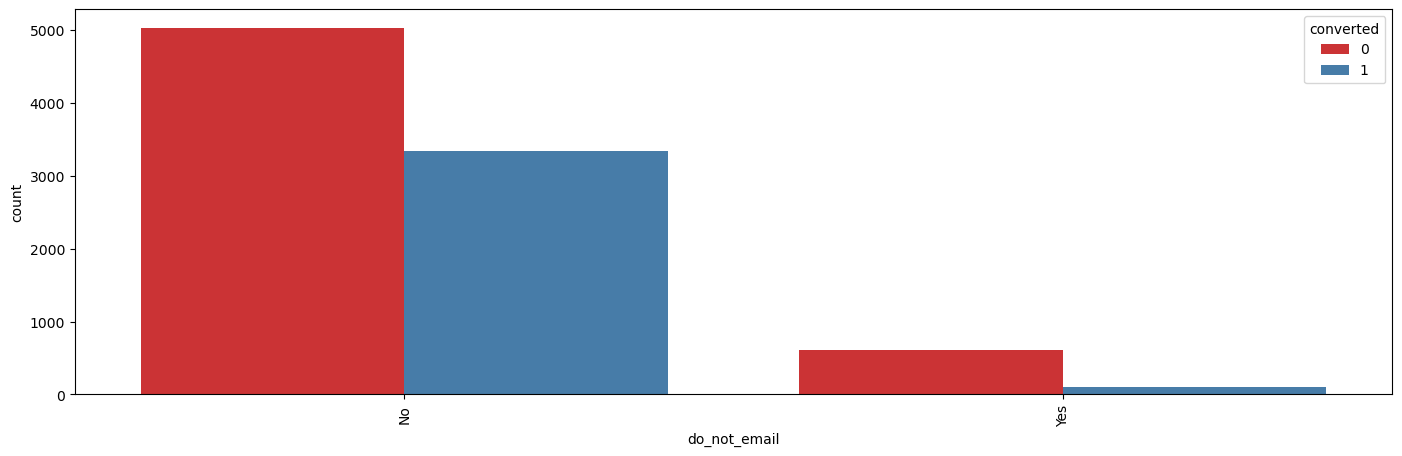

In [57]:
#5. Do Not Email - lets visualize this column

plt.figure(figsize = (17,5))
sns.countplot(x="do_not_email", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [58]:
#Mostly it's a No so nothing much to see.

In [59]:
#6. Total Visits - lets look at this column

Lead_df['totalvisits'].describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99])


count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: totalvisits, dtype: float64

<Axes: >

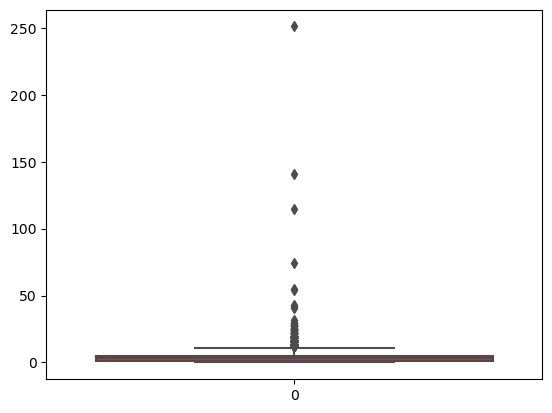

In [60]:
sns.boxplot(Lead_df['totalvisits'], orient='vert', palette='Set1')

In [61]:
#As we see there are lot of outliers lets cap it to 95% value

percentiles = Lead_df['totalvisits'].quantile([0.05,0.95]).values
Lead_df['totalvisits'][Lead_df['totalvisits'] <= percentiles[0]] = percentiles[0]
Lead_df['totalvisits'][Lead_df['totalvisits'] >= percentiles[1]] = percentiles[1]

C:\Users\Deepa Mudiganti\AppData\Local\Temp\ipykernel_41288\145922311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lead_df['totalvisits'][Lead_df['totalvisits'] <= percentiles[0]] = percentiles[0]
C:\Users\Deepa Mudiganti\AppData\Local\Temp\ipykernel_41288\145922311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lead_df['totalvisits'][Lead_df['totalvisits'] >= percentiles[1]] = percentiles[1]


<Axes: >

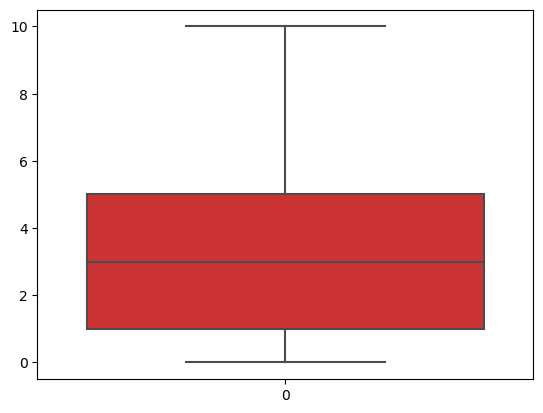

In [62]:
#Lets Visualize it now
sns.boxplot(Lead_df['totalvisits'], orient='vert', palette='Set1')

<Axes: xlabel='converted', ylabel='totalvisits'>

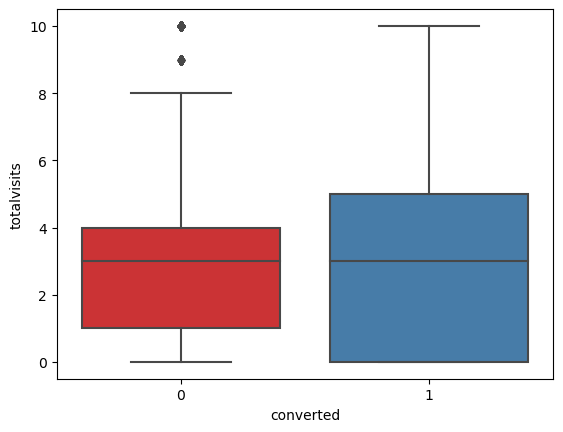

In [63]:
sns.boxplot(y = 'totalvisits', x = 'converted', data = Lead_df,palette='Set1')

In [64]:
#Nothing much can be observed here as it looks almost the same

In [65]:
#7. Total time spent on website - lets look at this column

Lead_df['total_time_spent_on_website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: total_time_spent_on_website, dtype: float64

<Axes: >

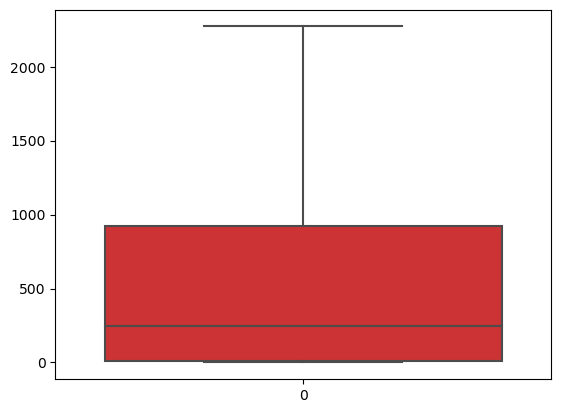

In [66]:
sns.boxplot(Lead_df['total_time_spent_on_website'], orient='vert', palette='Set1')

<Axes: xlabel='converted', ylabel='total_time_spent_on_website'>

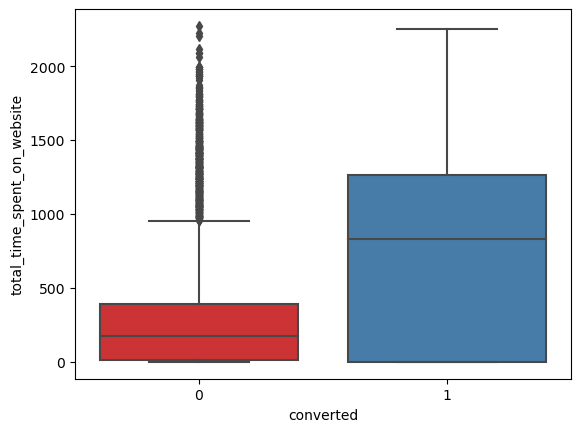

In [67]:
sns.boxplot(y = 'total_time_spent_on_website', x = 'converted', data = Lead_df,palette='Set1')

In [68]:
#Looks like leads spending more time on website have higher chance of converting

In [69]:
#8. Page views per visit - lets look at this column

Lead_df['page_views_per_visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: page_views_per_visit, dtype: float64

<Axes: >

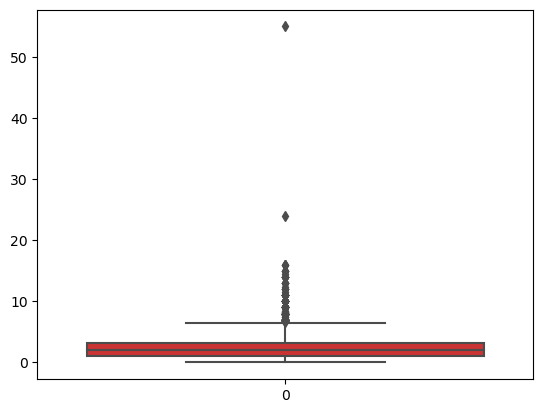

In [70]:
sns.boxplot(Lead_df['page_views_per_visit'], orient='vert', palette='Set1')

In [71]:
#Since there are outliers lets cap the value to 95%

percentiles = Lead_df['page_views_per_visit'].quantile([0.05,0.95]).values
Lead_df['page_views_per_visit'][Lead_df['page_views_per_visit'] <= percentiles[0]] = percentiles[0]
Lead_df['page_views_per_visit'][Lead_df['page_views_per_visit'] >= percentiles[1]] = percentiles[1]


C:\Users\Deepa Mudiganti\AppData\Local\Temp\ipykernel_41288\2029034282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lead_df['page_views_per_visit'][Lead_df['page_views_per_visit'] <= percentiles[0]] = percentiles[0]
C:\Users\Deepa Mudiganti\AppData\Local\Temp\ipykernel_41288\2029034282.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lead_df['page_views_per_visit'][Lead_df['page_views_per_visit'] >= percentiles[1]] = percentiles[1]


<Axes: >

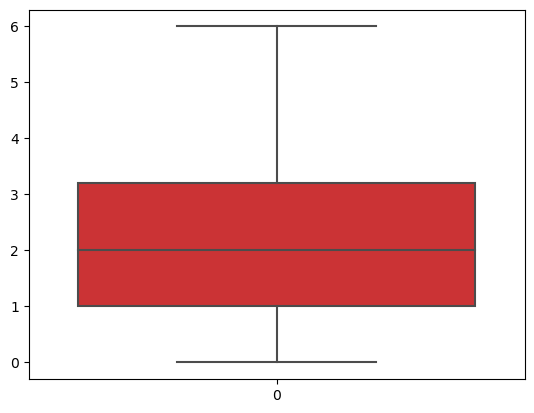

In [72]:
#Lets visualize it again

sns.boxplot(Lead_df['page_views_per_visit'], orient='vert', palette='Set1')

<Axes: xlabel='converted', ylabel='page_views_per_visit'>

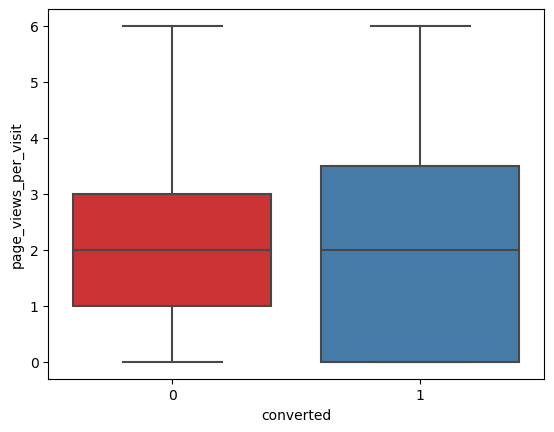

In [73]:
sns.boxplot(y = 'page_views_per_visit', x = 'converted', data = Lead_df,palette='Set1')

In [74]:
#Median for both is same so not much details

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

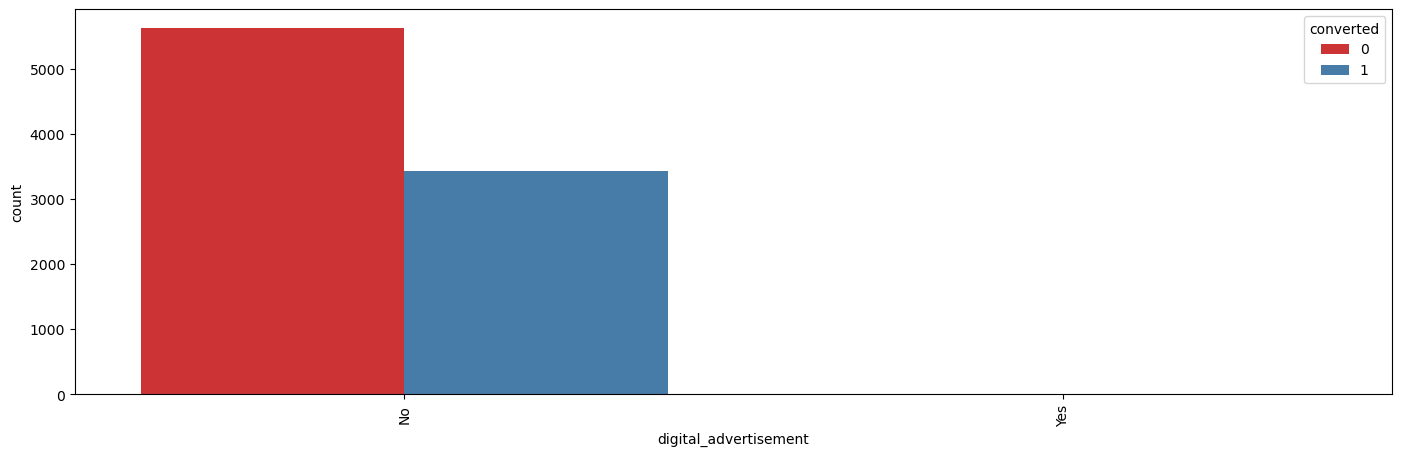

In [75]:
#9. Digital advertisement - lets look at this column


plt.figure(figsize = (17,5))
sns.countplot(x="digital_advertisement", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [76]:
#No use of this as most of the values are No

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

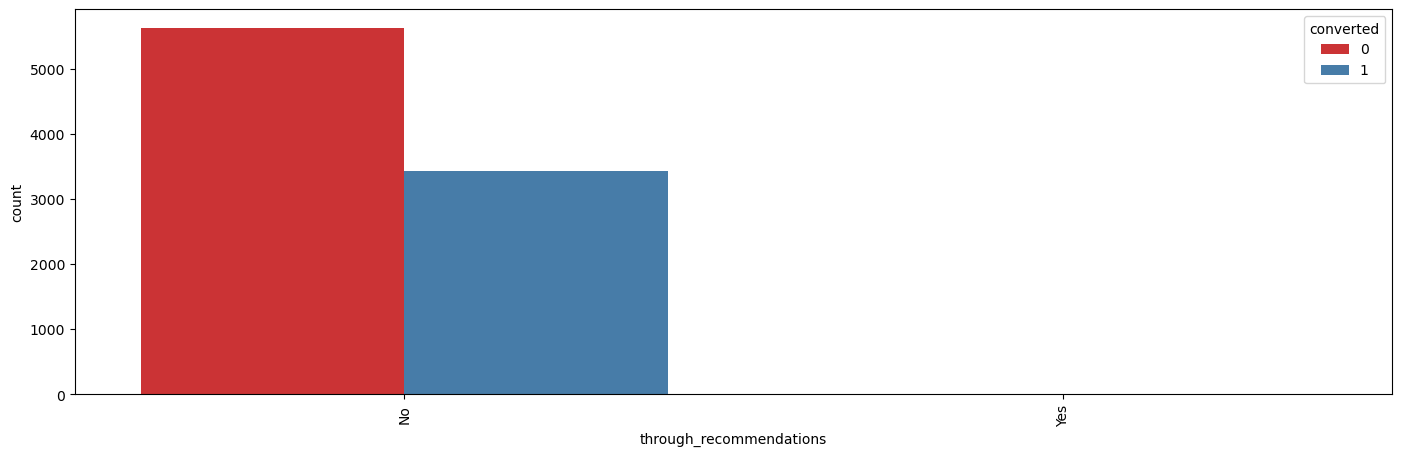

In [77]:
#10. Through recommendations - lets look at this column


plt.figure(figsize = (17,5))
sns.countplot(x="through_recommendations", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [78]:
#No use of this as most of the values are No

(array([0]), [Text(0, 0, 'No')])

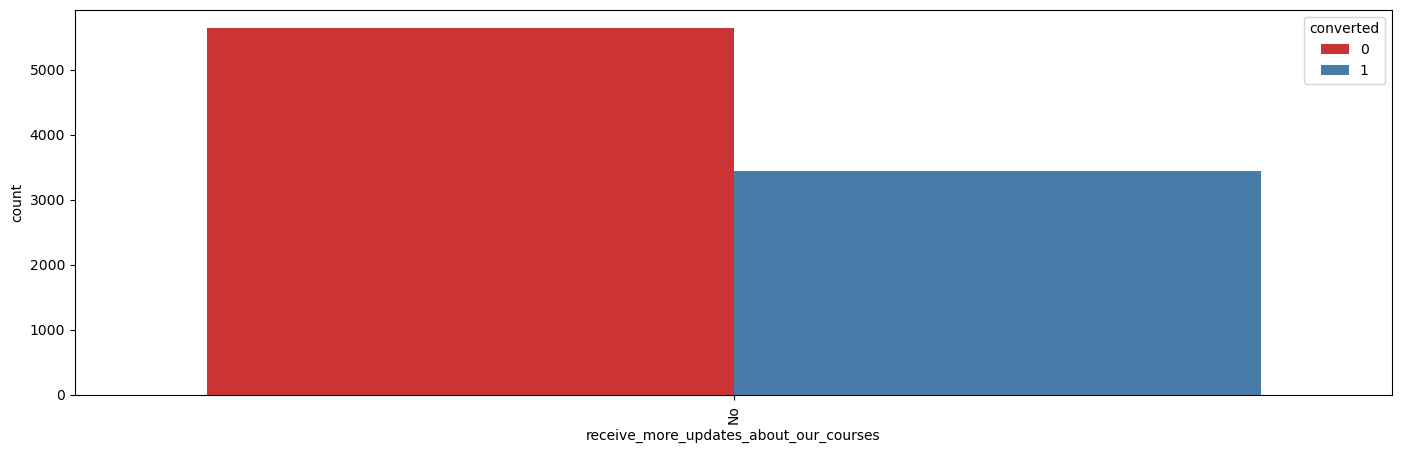

In [79]:
#11. Receive more updates about our courses - lets look at this column


plt.figure(figsize = (17,5))
sns.countplot(x="receive_more_updates_about_our_courses", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [80]:
#No use of this as most of the values are No

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

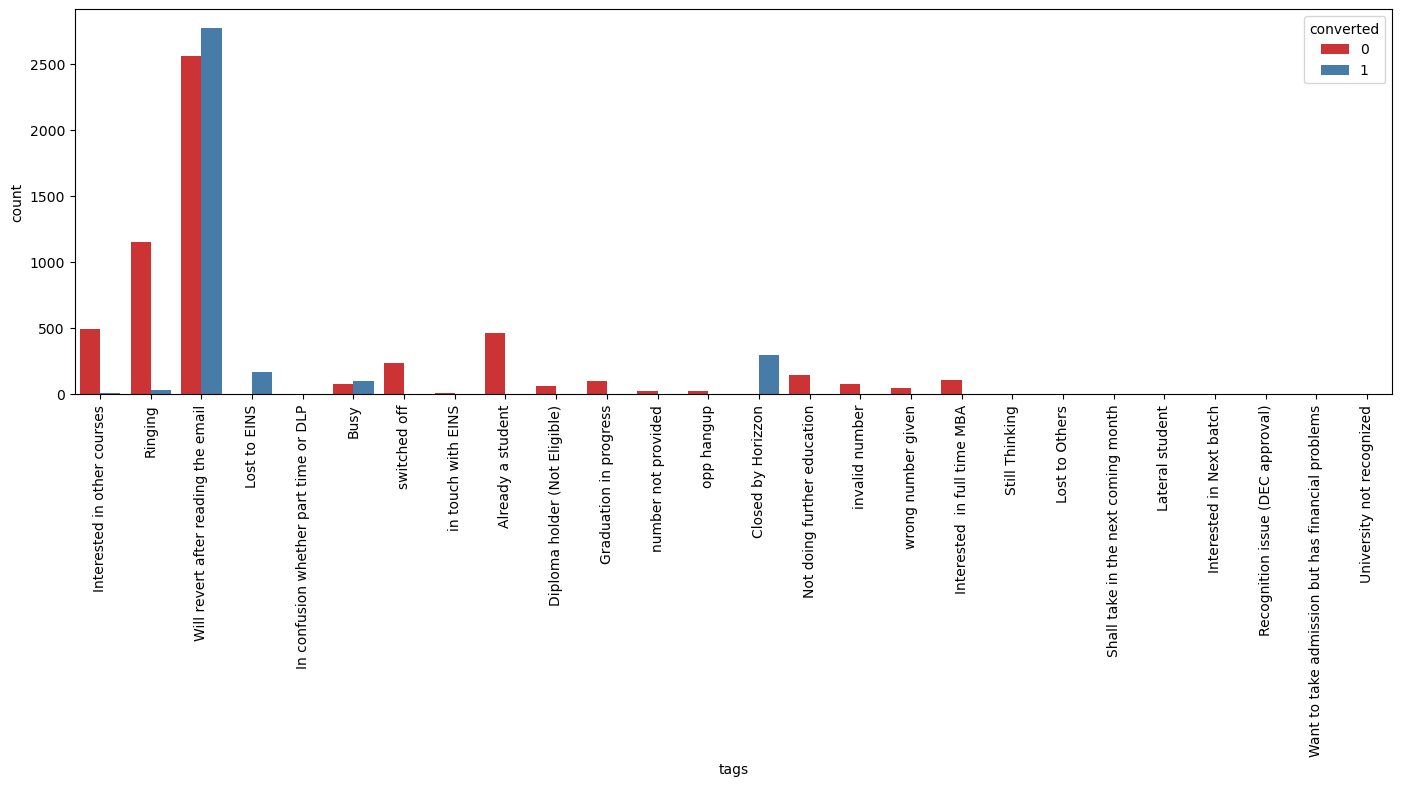

In [81]:
#12. Tags - lets look at this column


plt.figure(figsize = (17,5))
sns.countplot(x="tags", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [82]:
#We can remove this column before building a model as this is only for internal teams purpose

(array([0]), [Text(0, 0, 'No')])

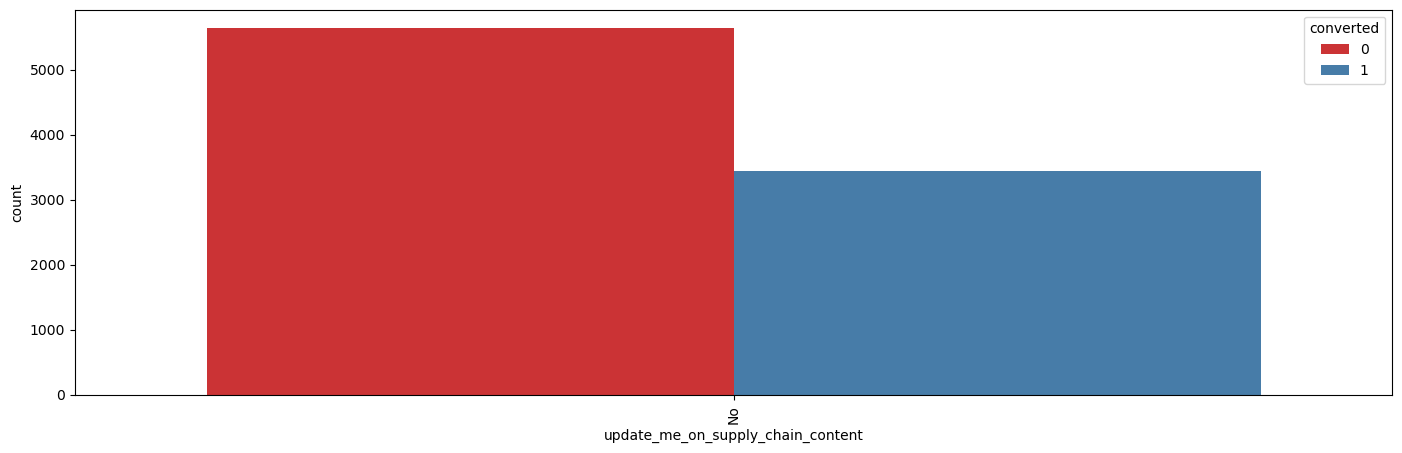

In [83]:
#13. Update me on supply chain content- lets look at this column


plt.figure(figsize = (17,5))
sns.countplot(x="update_me_on_supply_chain_content", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [84]:
#No use of this as most of the values are No

(array([0]), [Text(0, 0, 'No')])

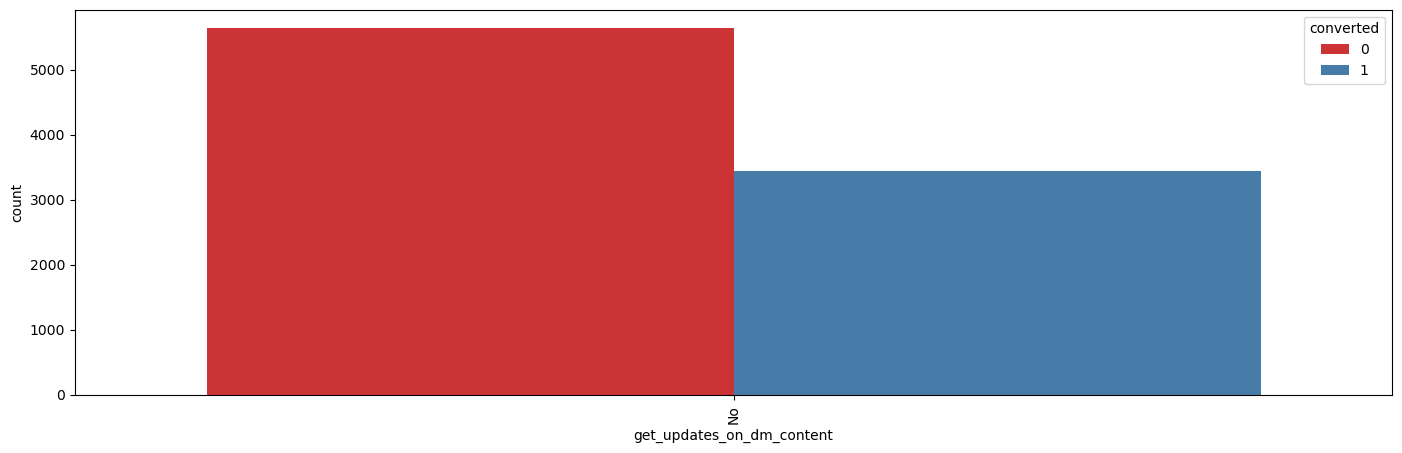

In [85]:
#14. Get updates on dm content - lets look at this column


plt.figure(figsize = (17,5))
sns.countplot(x="get_updates_on_dm_content", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [86]:
#No use of this as most of the values are No

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

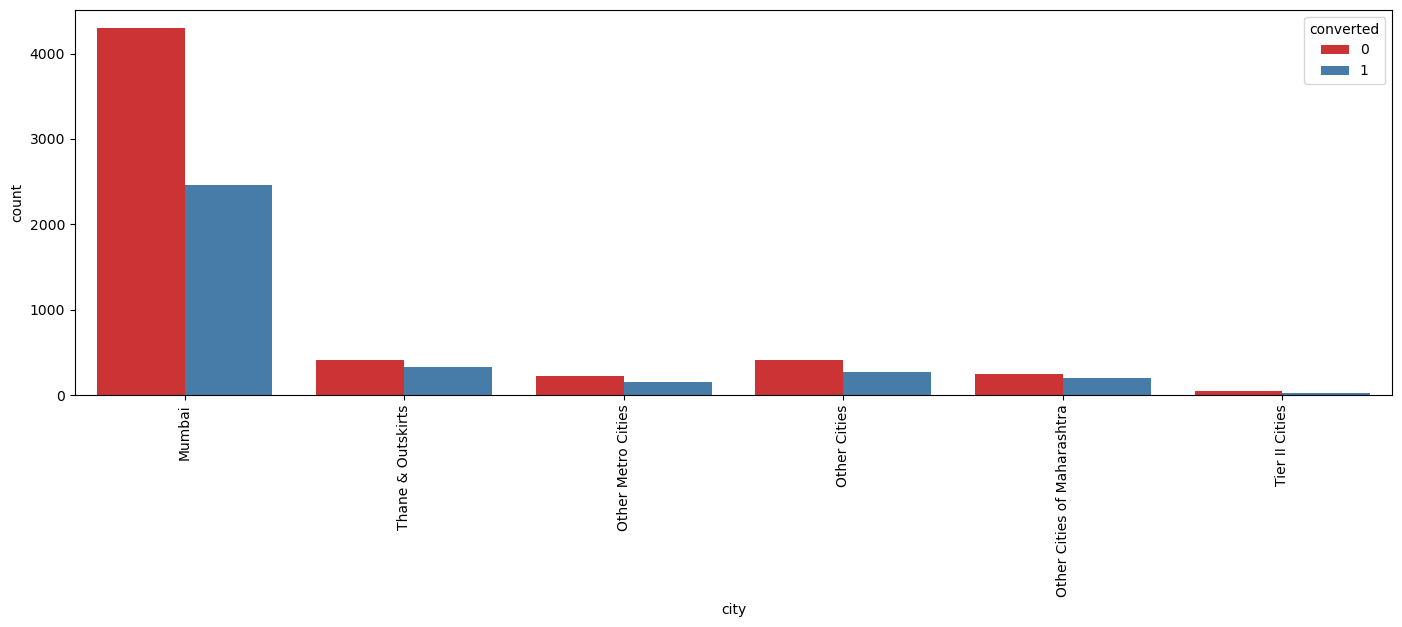

In [87]:
#15. City - lets look at this column


plt.figure(figsize = (17,5))
sns.countplot(x="city", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [88]:
#Most leads are from Mumbai with higher conversion rate

(array([0]), [Text(0, 0, 'No')])

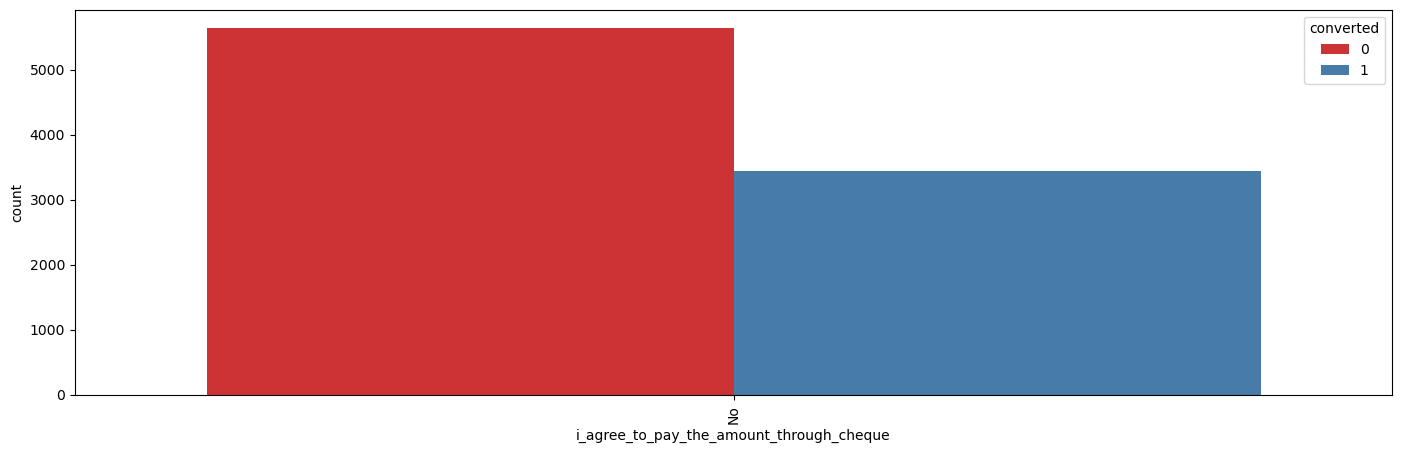

In [89]:
#16. I agree to pay the amount through cheque - lets look at this column


plt.figure(figsize = (17,5))
sns.countplot(x="i_agree_to_pay_the_amount_through_cheque", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [90]:
#No use of this as most of the values are No

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

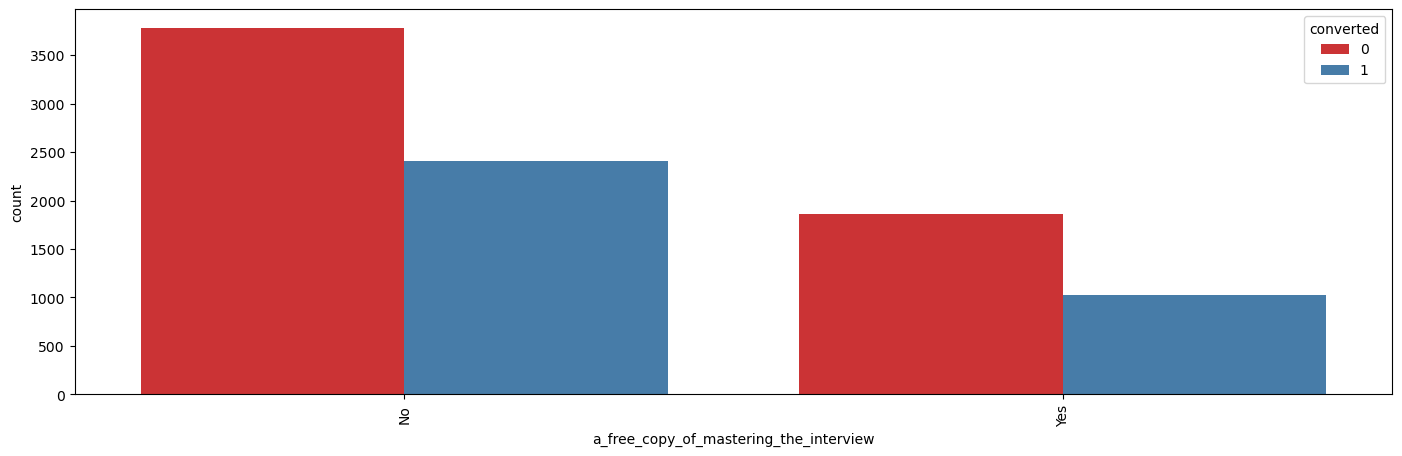

In [91]:
#17. A free copy of Mastering The Interview - lets look at this column


plt.figure(figsize = (17,5))
sns.countplot(x="a_free_copy_of_mastering_the_interview", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [92]:
#No use of this as most of the values are No

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

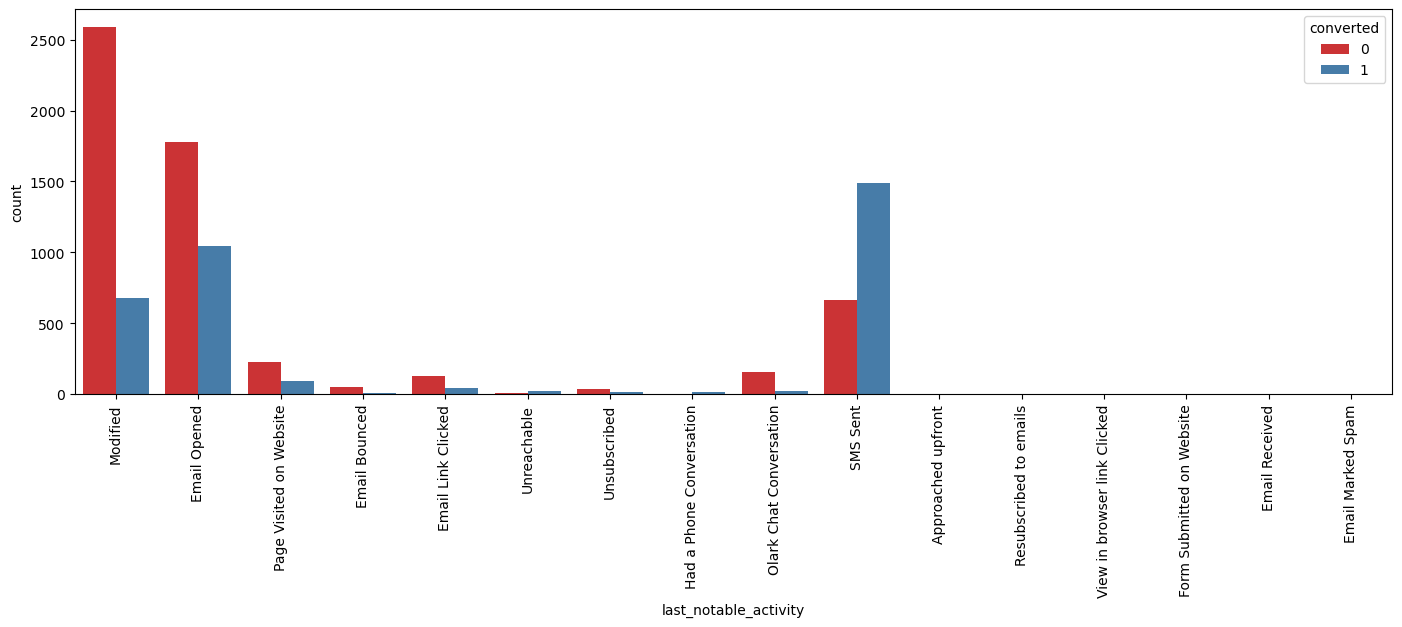

In [93]:
#18. Last Notable Activity - lets look at this column


plt.figure(figsize = (17,5))
sns.countplot(x="last_notable_activity", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [94]:
#No use of this as most of the values are No

In [95]:
#19. Last Activity - lets look at this column

Lead_df['last_activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: last_activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

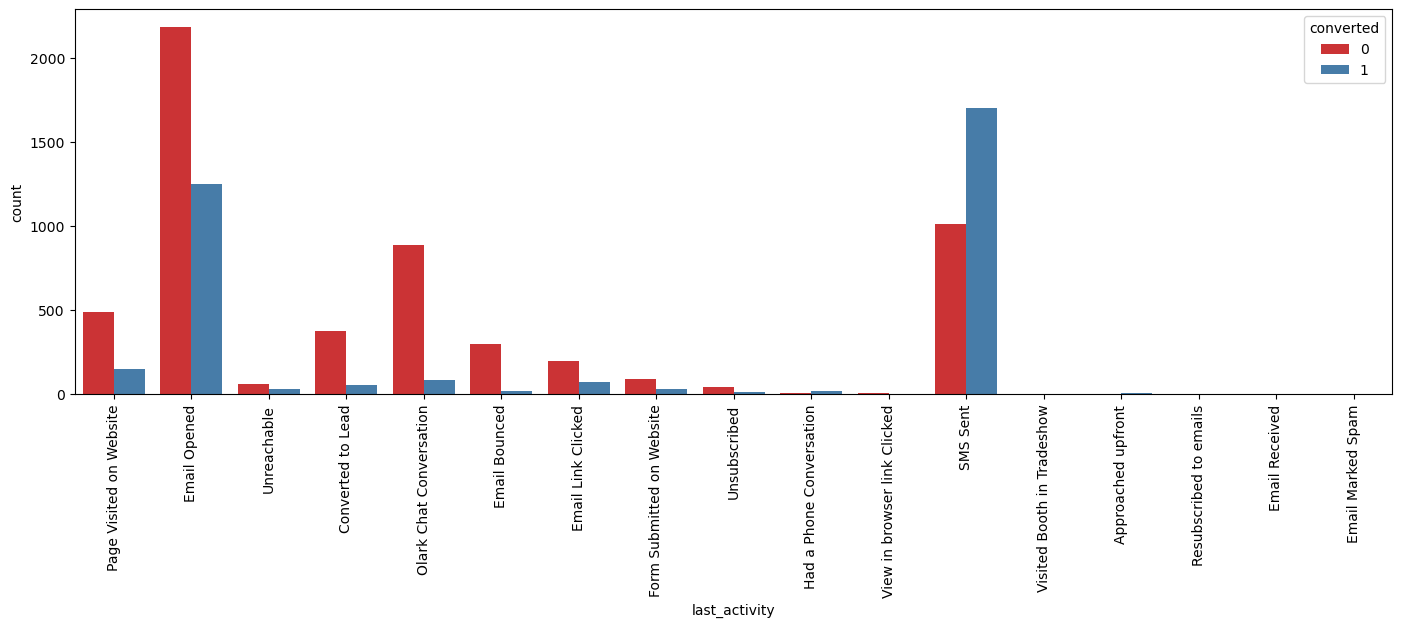

In [96]:
#Lets visualize this column

plt.figure(figsize = (17,5))
sns.countplot(x="last_activity", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [97]:
#Lets impute the missing data with Other_Activity and than visualize it again

Lead_df['last_activity'] = Lead_df['last_activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

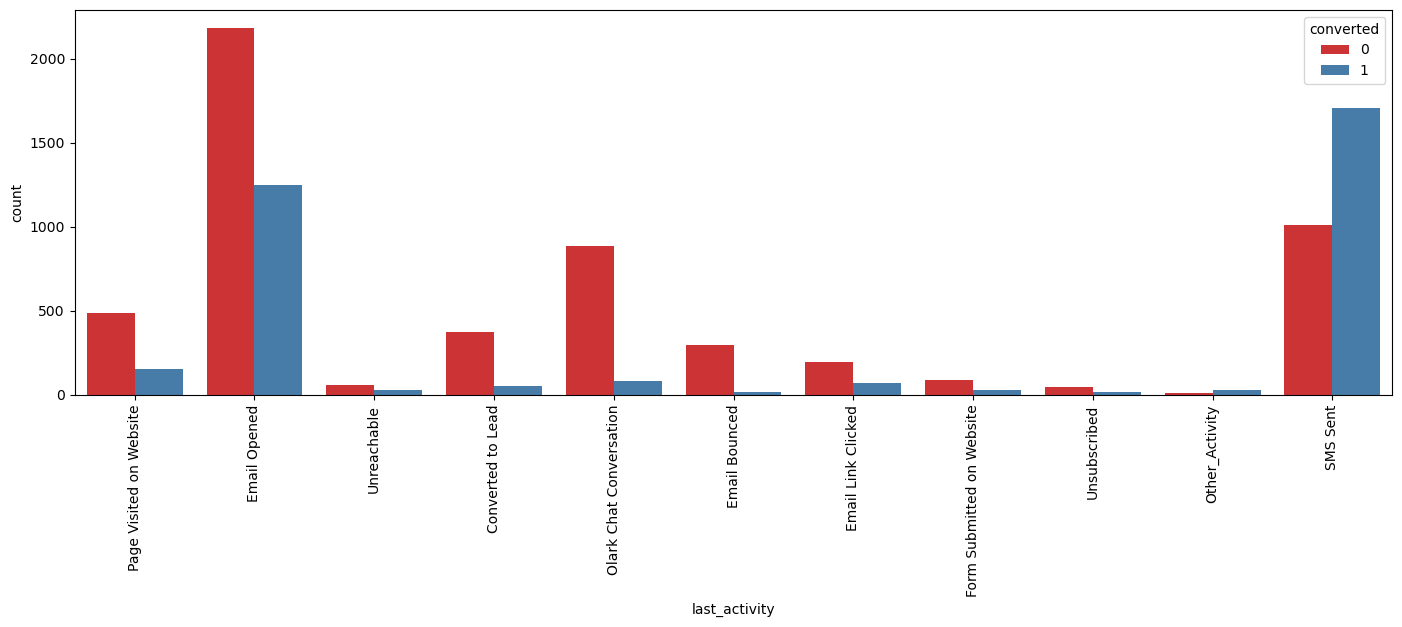

In [98]:
plt.figure(figsize = (17,5))
sns.countplot(x="last_activity", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [99]:
#Most of the converted leads have emails opened
#SMS sent lead have a higher conversion rate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

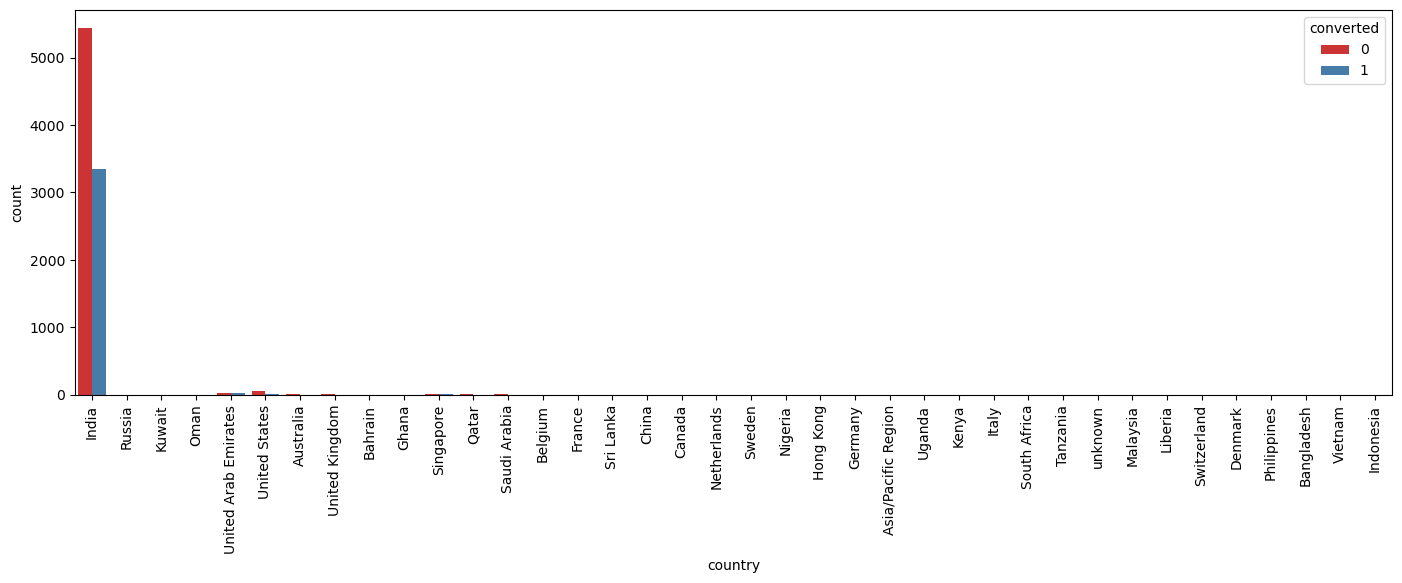

In [100]:
#20. Country - lets look at this column

plt.figure(figsize = (17,5))
sns.countplot(x="country", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [101]:
#Mostly leads are from India

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

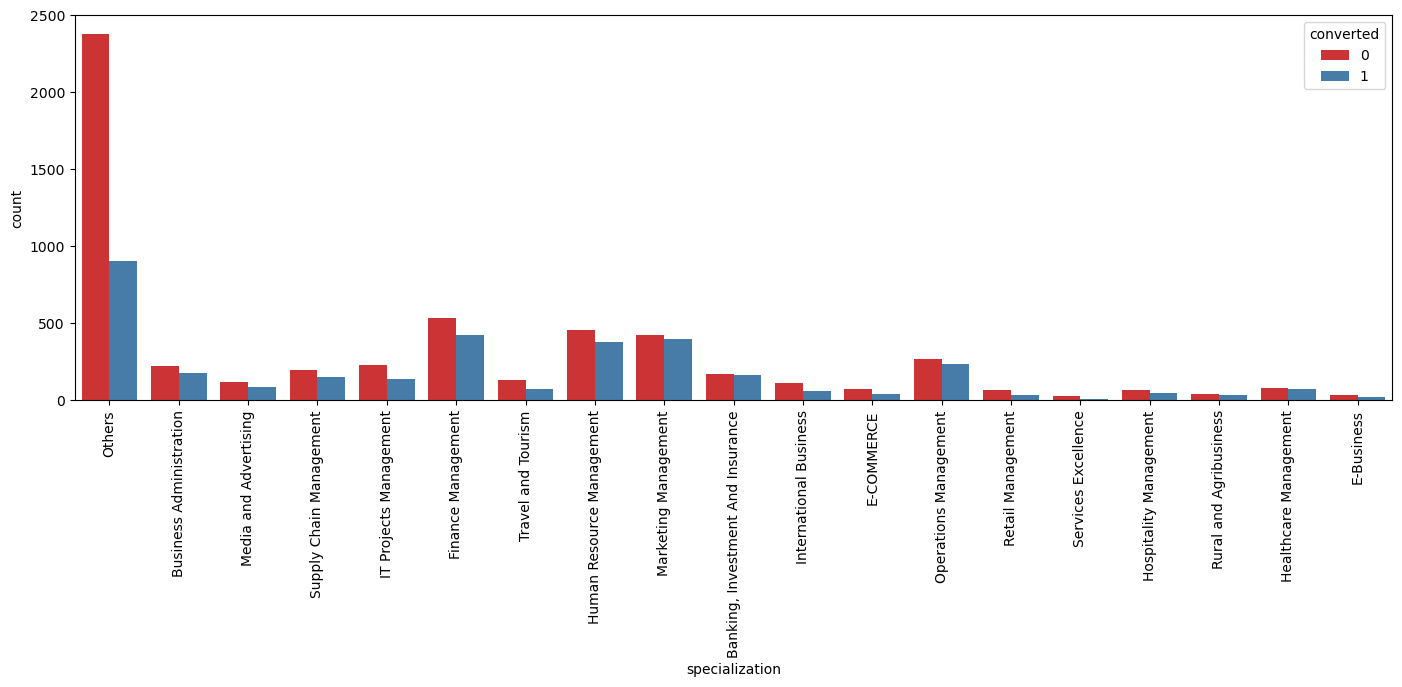

In [102]:
#21. Specialization - lets look at this column

plt.figure(figsize = (17,5))
sns.countplot(x="specialization", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [103]:
#Should focus more on specializations with higher conversion rates

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

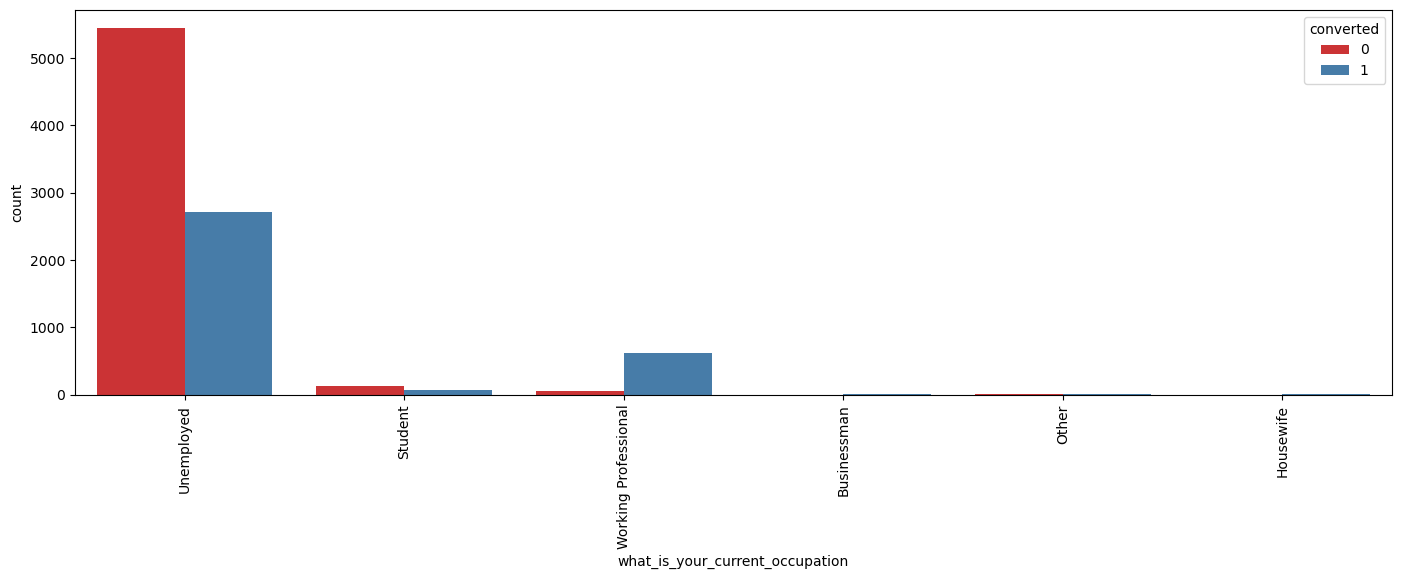

In [104]:
#22. What is your current occupation - lets look at this column

plt.figure(figsize = (17,5))
sns.countplot(x="what_is_your_current_occupation", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [105]:
#Unemployeed leads are more but the conversion rate is less
#Working professionals have a higher chance of conversion

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

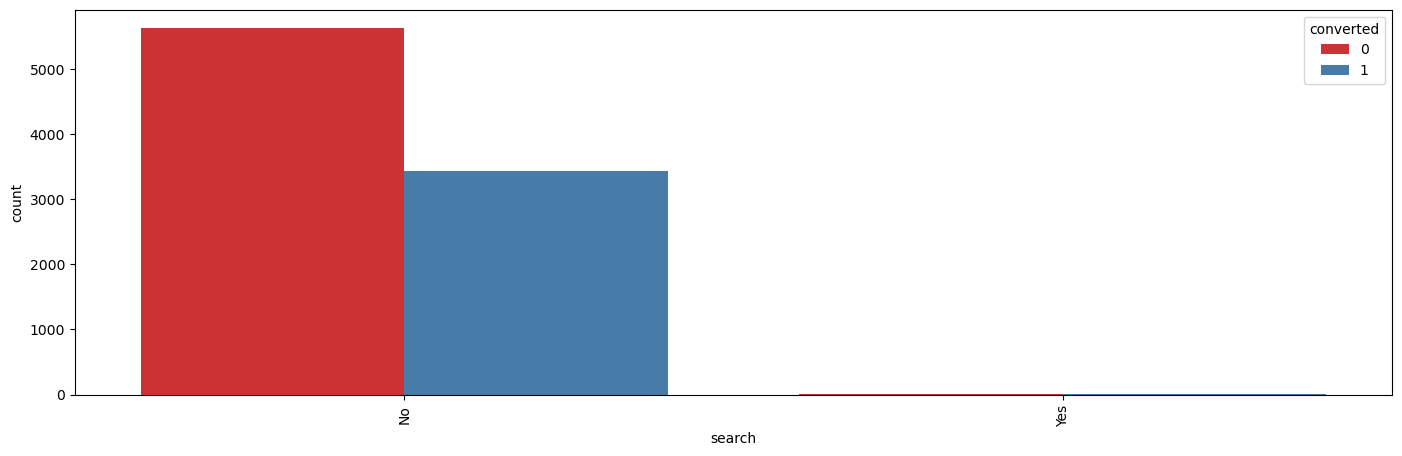

In [106]:
#23. Search - lets look at this column

plt.figure(figsize = (17,5))
sns.countplot(x="search", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [107]:
#No use of this as most of the values are No

(array([0]), [Text(0, 0, 'No')])

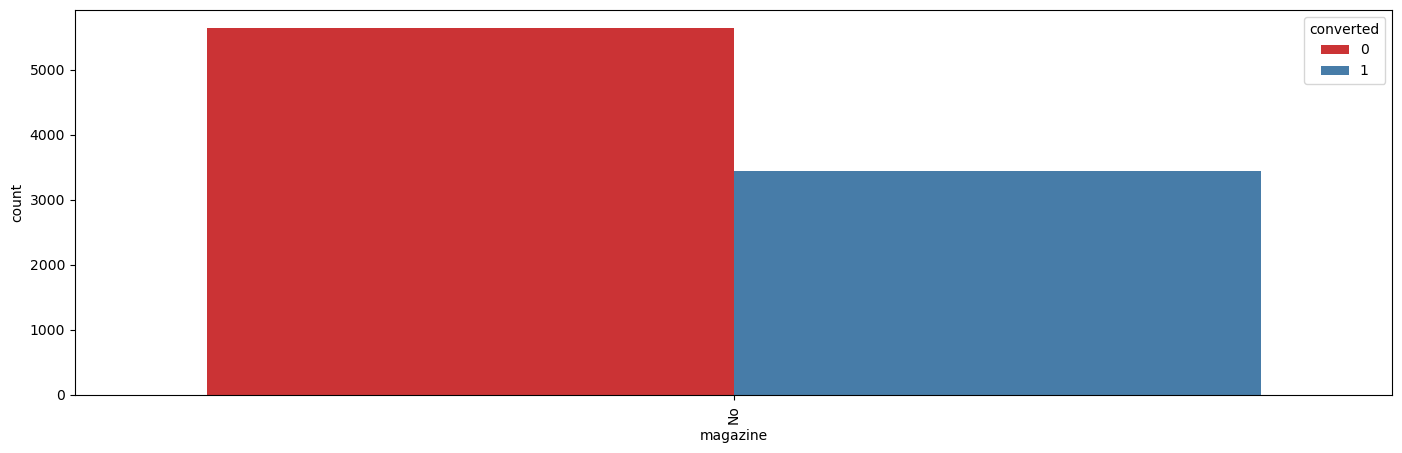

In [108]:
#24. Magazine - lets look at this column

plt.figure(figsize = (17,5))
sns.countplot(x="magazine", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [109]:
#No use of this as most of the values are No

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

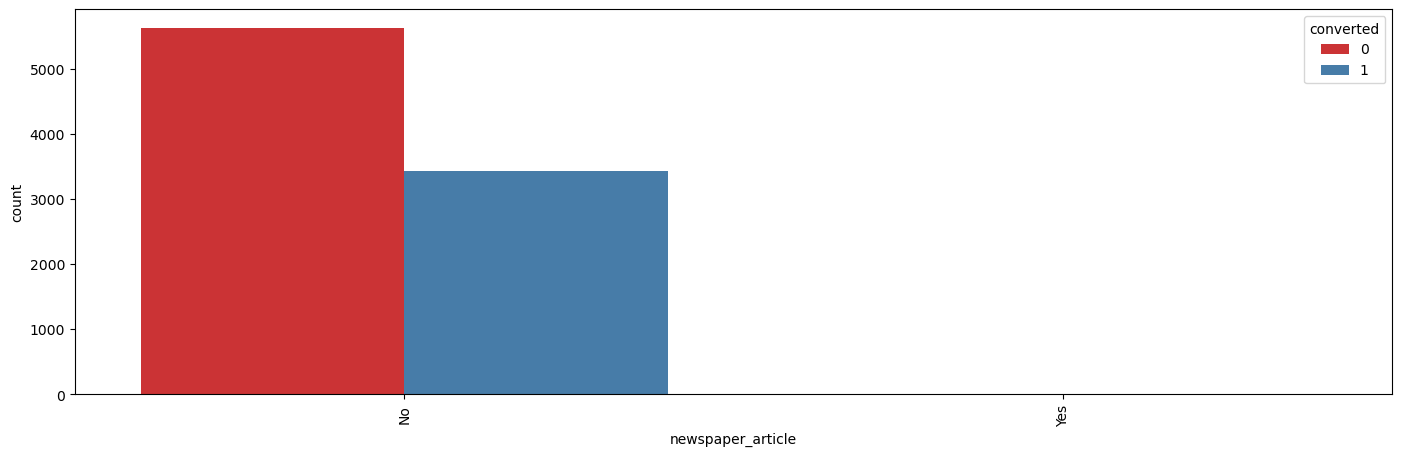

In [110]:
#25. Newspaper Article - lets look at this column

plt.figure(figsize = (17,5))
sns.countplot(x="newspaper_article", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [111]:
#No use of this as most of the values are No

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

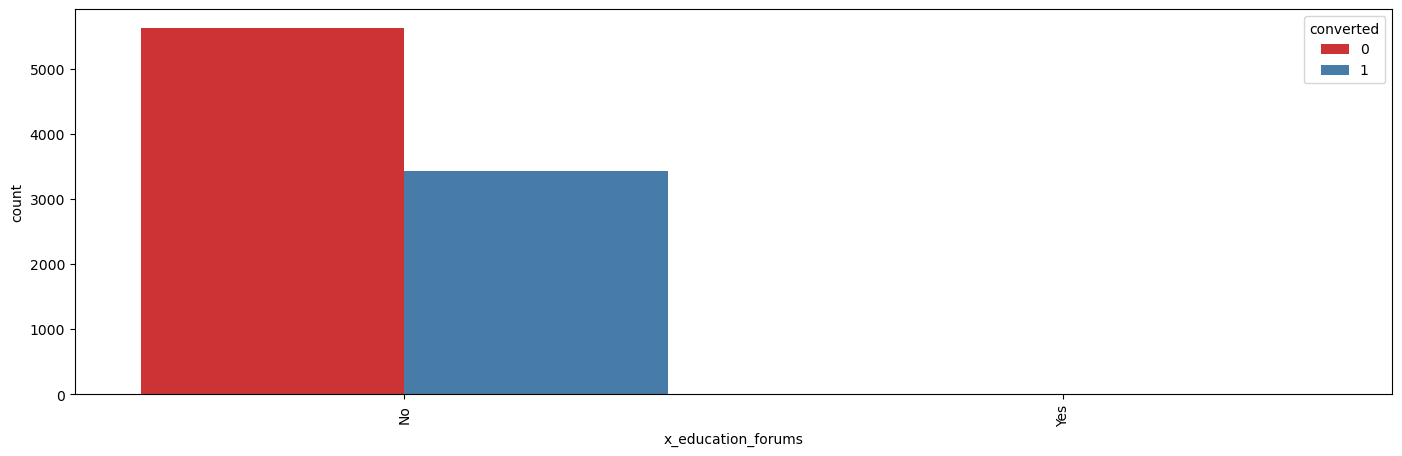

In [112]:
#26. X Education Forums - lets look at this column

plt.figure(figsize = (17,5))
sns.countplot(x="x_education_forums", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [113]:
#No use of this as most of the values are No

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

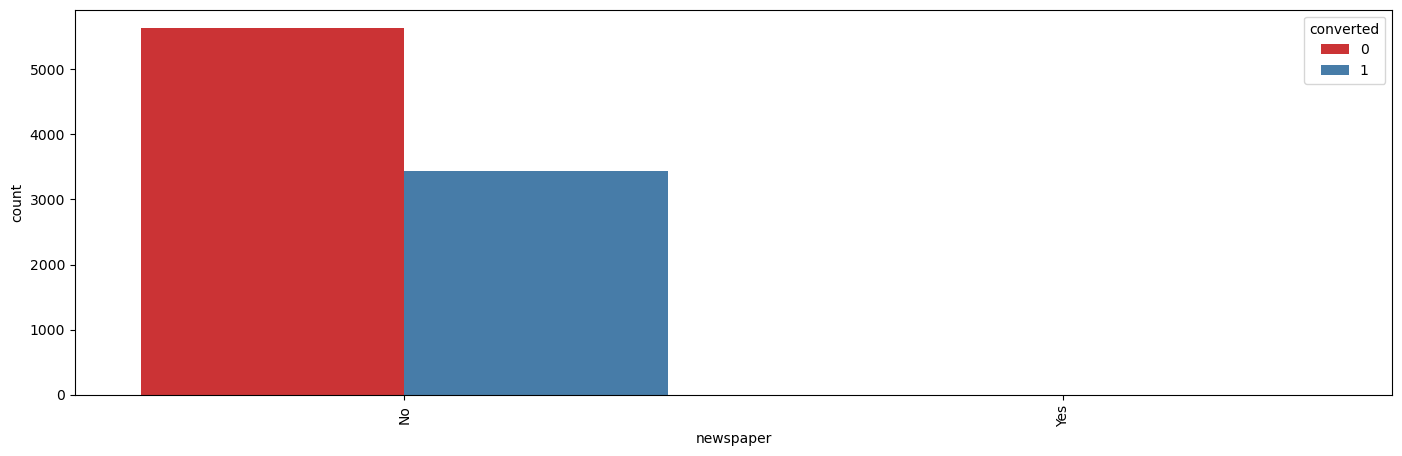

In [114]:
#27. Newspaper - lets look at this column

plt.figure(figsize = (17,5))
sns.countplot(x="newspaper", hue="converted", data=Lead_df, palette='Set1')
plt.xticks(rotation=90)

In [115]:
#No use of this as most of the values are No

In [116]:
Lead_df = Lead_df.drop(['lead_number','tags','country','receive_more_updates_about_our_courses', 'search', 'newspaper_article', 'x_education_forums', 
    'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine','a_free_copy_of_mastering_the_interview',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'i_agree_to_pay_the_amount_through_cheque'],axis=1)

In [117]:
Lead_df.columns

Index(['prospect_id', 'lead_origin', 'lead_source', 'do_not_email',
       'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'specialization', 'what_is_your_current_occupation', 'city',
       'last_notable_activity'],
      dtype='object')

In [118]:
Lead_df.shape

(9074, 14)

In [119]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   prospect_id                      9074 non-null   object 
 1   lead_origin                      9074 non-null   object 
 2   lead_source                      9074 non-null   object 
 3   do_not_email                     9074 non-null   object 
 4   do_not_call                      9074 non-null   object 
 5   converted                        9074 non-null   int64  
 6   totalvisits                      9074 non-null   float64
 7   total_time_spent_on_website      9074 non-null   int64  
 8   page_views_per_visit             9074 non-null   float64
 9   last_activity                    9074 non-null   object 
 10  specialization                   9074 non-null   object 
 11  what_is_your_current_occupation  9074 non-null   object 
 12  city                     

Data Preparation

In [120]:
#Treating the binary Variables
vars = ['do_not_call', 'do_not_email']
def binary_map(x):
    return x.map({'Yes':1, 'No':0})
    
Lead_df[vars] = Lead_df[vars].apply(binary_map)
    

In [121]:
Lead_df.isnull().sum()

prospect_id                        0
lead_origin                        0
lead_source                        0
do_not_email                       0
do_not_call                        0
converted                          0
totalvisits                        0
total_time_spent_on_website        0
page_views_per_visit               0
last_activity                      0
specialization                     0
what_is_your_current_occupation    0
city                               0
last_notable_activity              0
dtype: int64

In [122]:
#Creating dummy variables for categorical features and dropping the first one

dummy_data = pd.get_dummies(Lead_df[['lead_origin','lead_source','last_activity','specialization','what_is_your_current_occupation','city','last_notable_activity']],drop_first=True)
                                    
dummy_data.head()

,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Others,lead_source_Reference,lead_source_Referral Sites,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [123]:
dummy_data.replace({False:0,True:1}, inplace=True)
dummy_data.head()

,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Facebook,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Others,lead_source_Reference,lead_source_Referral Sites,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [124]:
#Concatenating the dummy data to the original one

Lead_df = pd.concat([Lead_df,dummy_data],axis=1)
Lead_df.head()

,prospect_id,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [125]:
Lead_df.replace({False:0,True:1}, inplace=True)
Lead_df.head()

,prospect_id,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [126]:
#dropping columns for which dummies are created
Lead_df = Lead_df.drop(Lead_df[['lead_origin','lead_source','last_activity','specialization','what_is_your_current_occupation','city','last_notable_activity']],axis=1)
Lead_df.head()

,prospect_id,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [127]:
#Splitting the data into Train and Test

from sklearn.model_selection import train_test_split

X= Lead_df.drop(['prospect_id','converted'],axis=1)
X.head()

,do_not_email,do_not_call,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Facebook,lead_source_Google,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [128]:
y=Lead_df['converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)


In [130]:
#Scaling the features

from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()


X_train[['totalvisits','total_time_spent_on_website','page_views_per_visit']] = Scaler.fit_transform(X_train[['totalvisits','total_time_spent_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,do_not_call,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Facebook,lead_source_Google,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [131]:
Converted = (sum(Lead_df['converted'])/len(Lead_df['converted'].index))*100
Converted

37.85541106458012

In [132]:
#As we can see we have almost 38% Lead conversion rate

In [133]:
#Lets do RFE via Feature Selection

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, step=20)

rfe = rfe.fit(X_train, y_train)



C:\Users\Deepa Mudiganti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Deepa Mudiganti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [134]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True])

In [135]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('do_not_email', True, 1),
 ('do_not_call', True, 1),
 ('totalvisits', False, 2),
 ('total_time_spent_on_website', True, 1),
 ('page_views_per_visit', False, 2),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', True, 1),
 ('lead_source_Facebook', False, 2),
 ('lead_source_Google', False, 2),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', False, 3),
 ('lead_source_Others', False, 2),
 ('lead_source_Reference', True, 1),
 ('lead_source_Referral Sites', False, 3),
 ('lead_source_Welingak Website', True, 1),
 ('last_activity_Email Bounced', False, 2),
 ('last_activity_Email Link Clicked', True, 1),
 ('last_activity_Email Opened', True, 1),
 ('last_activity_Form Submitted on Website', False, 3),
 ('last_activity_Olark Chat Conversation', True, 1),
 ('last_activity_Other_Activity', True, 1),
 ('last_activity_Page Visited on Website', False, 2),
 ('last_activity_SMS Sent', True, 1),
 ('last_activit

In [136]:
#Lets view the columns selected by rfe
cols = X_train.columns[rfe.support_]
cols

Index(['do_not_email', 'do_not_call', 'total_time_spent_on_website',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_origin_Lead Import', 'lead_source_Olark Chat',
       'lead_source_Reference', 'lead_source_Welingak Website',
       'last_activity_Email Link Clicked', 'last_activity_Email Opened',
       'last_activity_Olark Chat Conversation', 'last_activity_Other_Activity',
       'last_activity_SMS Sent', 'last_activity_Unreachable',
       'last_activity_Unsubscribed', 'specialization_Hospitality Management',
       'specialization_Others', 'what_is_your_current_occupation_Housewife',
       'what_is_your_current_occupation_Student',
       'what_is_your_current_occupation_Unemployed',
       'what_is_your_current_occupation_Working Professional',
       'city_Tier II Cities', 'last_notable_activity_Email Bounced',
       'last_notable_activity_Email Link Clicked',
       'last_notable_activity_Email Opened',
       'last_notable_activity_H

# Model Building

In [137]:
#Model 1
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[cols])
model_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.6
Date:                Thu, 20 Jun 2024   Deviance:                       5135.2
Time:                        19:33:57   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6007      1.661      0.964      0.335      -1.654       4.855
do_not_email                                            -1.6564      0.210     -7.881      0.000      -2.068      -1.244
do_not_call                                             21.6137    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
total_time_spent_on_website                              1.1101      0.041     26.997      0.000       1.030       1.191
lead_origin_Landing Page Submission                     -1.1126      0.130     -8.531      0.000      -1.368      -0.857
lead_origin_Lead Add Form                                1.4997      0.889      1.686      0.092      -0.244       3.243
lead_origin_Lead Import                                  0.9100      0.477      1.909      0.056      -0.024       1.844
lead_source_Olark Chat                                   1.1030      0.125      8.854      0.000       0.859       1.347
lead_source_Reference                                    1.8289      0.914      2.001      0.045       0.038       3.620
lead_source_Welingak Website                             4.4013      1.147      3.838      0.000       2.154       6.649
last_activity_Email Link Clicked                         0.4575      0.396      1.156      0.248      -0.318       1.233
last_activity_Email Opened                               0.6642      0.185      3.598      0.000       0.302       1.026
last_activity_Olark Chat Conversation                   -0.6190      0.227     -2.733      0.006      -1.063      -0.175
last_activity_Other_Activity                             2.1619      0.603      3.587      0.000       0.981       3.343
last_activity_SMS Sent                                   1.1159      0.187      5.978      0.000       0.750       1.482
last_activity_Unreachable                                0.2990      0.509      0.588      0.557      -0.698       1.296
last_activity_Unsubscribed                               1.3943      1.125      1.240      0.215      -0.810       3.598
specialization_Hospitality Management                   -0.4284      0.329     -1.303      0.193      -1.073       0.216
specialization_Others                                   -1.1435      0.127     -9.022      0.000      -1.392      -0.895
what_is_your_current_occupation_Housewife               21.7279   1.53e+04      0.001      0.999   -2.99e+04       3e+04
what_is_your_current_occupation_Student                 -0.5905      0.687     -0.859      0.390      -1.938       0.757
what_is_your_current_occupation_Unemployed              -1.0375      0.649     -1.599      0.110      -2.309       0.234
what_is_your_current_occupation_Working Professional     1

In [138]:
# We see that last_notable_activity_View in browser link Clicked,what_is_your_current_occupation_Housewife,do_not_call have the highest P values. Lets deal with these columns one by one.

In [139]:
cols1 = cols.drop('last_notable_activity_View in browser link Clicked')

In [140]:
#Lets calcuate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif


,Features,VIF
20,what_is_your_current_occupation_Unemployed,279.42
27,last_notable_activity_Modified,112.62
25,last_notable_activity_Email Opened,101.48
30,last_notable_activity_SMS Sent,81.80
4,lead_origin_Lead Add Form,62.69
7,lead_source_Reference,48.14
21,what_is_your_current_occupation_Working Profes...,24.50
8,lead_source_Welingak Website,15.52
29,last_notable_activity_Page Visited on Website,11.62
10,last_activity_Email Opened,9.24


In [141]:
#Model 2

X_train_sm = sm.add_constant(X_train[cols1])
model_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.1
Date:                Thu, 20 Jun 2024   Deviance:                       5138.1
Time:                        19:36:18   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4079
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4219      1.355      0.311      0.755      -2.233       3.077
do_not_email                                            -1.6490      0.209     -7.875      0.000      -2.059      -1.239
do_not_call                                             21.6179    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
total_time_spent_on_website                              1.1116      0.041     27.040      0.000       1.031       1.192
lead_origin_Landing Page Submission                     -1.1020      0.130     -8.463      0.000      -1.357      -0.847
lead_origin_Lead Add Form                                1.5068      0.890      1.693      0.090      -0.237       3.251
lead_origin_Lead Import                                  0.9188      0.476      1.929      0.054      -0.015       1.852
lead_source_Olark Chat                                   1.1096      0.125      8.911      0.000       0.866       1.354
lead_source_Reference                                    1.8324      0.914      2.004      0.045       0.041       3.624
lead_source_Welingak Website                             4.3969      1.147      3.833      0.000       2.149       6.645
last_activity_Email Link Clicked                         0.4550      0.396      1.149      0.250      -0.321       1.231
last_activity_Email Opened                               0.6616      0.185      3.585      0.000       0.300       1.023
last_activity_Olark Chat Conversation                   -0.6218      0.226     -2.746      0.006      -1.066      -0.178
last_activity_Other_Activity                             2.0971      0.604      3.470      0.001       0.913       3.282
last_activity_SMS Sent                                   1.1130      0.187      5.964      0.000       0.747       1.479
last_activity_Unreachable                                0.2962      0.509      0.582      0.560      -0.701       1.293
last_activity_Unsubscribed                               1.3875      1.125      1.234      0.217      -0.817       3.592
specialization_Hospitality Management                   -0.4286      0.329     -1.303      0.192      -1.073       0.216
specialization_Others                                   -1.1350      0.127     -8.968      0.000      -1.383      -0.887
what_is_your_current_occupation_Housewife               21.7268   1.53e+04      0.001      0.999   -2.99e+04       3e+04
what_is_your_current_occupation_Student                 -0.5933      0.687     -0.864      0.388      -1.940       0.753
what_is_your_current_occupation_Unemployed              -1.0398      0.648     -1.603      0.109      -2.311       0.231
what_is_your_current_occupation_Working Professional     1

In [142]:
#Lets drop the column what_is_your_current_occupation_Housewife

cols1 = cols1.drop('what_is_your_current_occupation_Housewife')

In [143]:
#Lets calcuate VIF

vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
19,what_is_your_current_occupation_Unemployed,205.24
26,last_notable_activity_Modified,84.26
24,last_notable_activity_Email Opened,77.28
4,lead_origin_Lead Add Form,62.69
29,last_notable_activity_SMS Sent,62.42
7,lead_source_Reference,48.14
20,what_is_your_current_occupation_Working Profes...,18.20
8,lead_source_Welingak Website,15.52
10,last_activity_Email Opened,9.23
28,last_notable_activity_Page Visited on Website,8.87


In [144]:
#Model 3

X_train_sm = sm.add_constant(X_train[cols1])
model_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.0
Date:                Thu, 20 Jun 2024   Deviance:                       5142.0
Time:                        19:37:08   Pearson chi2:                 6.40e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4075
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9098      1.331      0.684      0.494      -1.699       3.518
do_not_email                                            -1.6527      0.210     -7.887      0.000      -2.063      -1.242
do_not_call                                             19.6217   1.22e+04      0.002      0.999   -2.38e+04    2.38e+04
total_time_spent_on_website                              1.1105      0.041     27.031      0.000       1.030       1.191
lead_origin_Landing Page Submission                     -1.0954      0.130     -8.421      0.000      -1.350      -0.840
lead_origin_Lead Add Form                                1.5097      0.890      1.697      0.090      -0.234       3.254
lead_origin_Lead Import                                  0.9200      0.476      1.932      0.053      -0.013       1.854
lead_source_Olark Chat                                   1.1097      0.125      8.911      0.000       0.866       1.354
lead_source_Reference                                    1.8347      0.914      2.007      0.045       0.043       3.626
lead_source_Welingak Website                             4.3946      1.147      3.831      0.000       2.146       6.643
last_activity_Email Link Clicked                         0.4605      0.396      1.163      0.245      -0.315       1.236
last_activity_Email Opened                               0.6668      0.185      3.612      0.000       0.305       1.029
last_activity_Olark Chat Conversation                   -0.6187      0.227     -2.730      0.006      -1.063      -0.174
last_activity_Other_Activity                             2.1025      0.604      3.479      0.001       0.918       3.287
last_activity_SMS Sent                                   1.1178      0.187      5.988      0.000       0.752       1.484
last_activity_Unreachable                                0.3010      0.509      0.592      0.554      -0.696       1.298
last_activity_Unsubscribed                               1.3943      1.125      1.240      0.215      -0.810       3.599
specialization_Hospitality Management                   -0.4287      0.329     -1.304      0.192      -1.073       0.216
specialization_Others                                   -1.1312      0.126     -8.945      0.000      -1.379      -0.883
what_is_your_current_occupation_Student                 -1.0898      0.637     -1.710      0.087      -2.339       0.160
what_is_your_current_occupation_Unemployed              -1.5354      0.596     -2.577      0.010      -2.703      -0.367
what_is_your_current_occupation_Working Professional     1.0954      0.624      1.756      0.079      -0.127       2.318
city_Tier II Cities                                     -0

In [145]:
#Lets drop the column what_is_your_current_occupation_Unemployed which has high VIF

cols1 = cols1.drop('what_is_your_current_occupation_Unemployed')


In [146]:
#Lets calcuate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,lead_origin_Lead Add Form,62.69
7,lead_source_Reference,48.13
8,lead_source_Welingak Website,15.52
23,last_notable_activity_Email Opened,12.06
28,last_notable_activity_SMS Sent,10.04
10,last_activity_Email Opened,9.22
25,last_notable_activity_Modified,7.68
13,last_activity_SMS Sent,7.63
3,lead_origin_Landing Page Submission,7.33
17,specialization_Others,4.68


In [147]:
#Model 4

X_train_sm = sm.add_constant(X_train[cols1])
model_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.6
Date:                Thu, 20 Jun 2024   Deviance:                       5149.2
Time:                        19:37:14   Pearson chi2:                 6.41e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4068
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6049      1.195     -0.506      0.613      -2.947       1.738
do_not_email                                            -1.6439      0.209     -7.851      0.000      -2.054      -1.234
do_not_call                                             19.5853   1.22e+04      0.002      0.999   -2.38e+04    2.38e+04
total_time_spent_on_website                              1.1116      0.041     27.072      0.000       1.031       1.192
lead_origin_Landing Page Submission                     -1.1167      0.130     -8.597      0.000      -1.371      -0.862
lead_origin_Lead Add Form                                1.4937      0.890      1.679      0.093      -0.250       3.237
lead_origin_Lead Import                                  0.9021      0.477      1.892      0.058      -0.032       1.836
lead_source_Olark Chat                                   1.1050      0.124      8.880      0.000       0.861       1.349
lead_source_Reference                                    1.8569      0.914      2.032      0.042       0.066       3.648
lead_source_Welingak Website                             4.4067      1.147      3.842      0.000       2.159       6.655
last_activity_Email Link Clicked                         0.4477      0.396      1.130      0.259      -0.329       1.224
last_activity_Email Opened                               0.6599      0.184      3.579      0.000       0.299       1.021
last_activity_Olark Chat Conversation                   -0.6180      0.226     -2.732      0.006      -1.061      -0.175
last_activity_Other_Activity                             2.0935      0.604      3.464      0.001       0.909       3.278
last_activity_SMS Sent                                   1.1072      0.187      5.935      0.000       0.742       1.473
last_activity_Unreachable                                0.2875      0.509      0.565      0.572      -0.710       1.285
last_activity_Unsubscribed                               1.3766      1.125      1.224      0.221      -0.828       3.581
specialization_Hospitality Management                   -0.4383      0.329     -1.333      0.183      -1.083       0.206
specialization_Others                                   -1.1541      0.126     -9.136      0.000      -1.402      -0.907
what_is_your_current_occupation_Student                  0.4381      0.233      1.879      0.060      -0.019       0.895
what_is_your_current_occupation_Working Professional     2.6215      0.196     13.385      0.000       2.238       3.005
city_Tier II Cities                                     -0.5727      0.455     -1.258      0.209      -1.465       0.320
last_notable_activity_Email Bounced                      0

In [148]:
#Lets drop the column what_is_your_current_occupation_Unemployed which has high VIF

cols1 = cols1.drop('lead_origin_Lead Add Form')


In [149]:
#Lets calcuate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
22,last_notable_activity_Email Opened,12.04
27,last_notable_activity_SMS Sent,10.01
9,last_activity_Email Opened,9.22
24,last_notable_activity_Modified,7.65
12,last_activity_SMS Sent,7.63
3,lead_origin_Landing Page Submission,7.30
16,specialization_Others,4.67
29,last_notable_activity_Unsubscribed,3.66
14,last_activity_Unsubscribed,3.62
21,last_notable_activity_Email Link Clicked,3.29


In [150]:
#Model 5

X_train_sm = sm.add_constant(X_train[cols1])
model_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.2
Date:                Thu, 20 Jun 2024   Deviance:                       5152.3
Time:                        19:37:16   Pearson chi2:                 6.42e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4065
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5869      1.195     -0.491      0.623      -2.928       1.754
do_not_email                                            -1.6462      0.209     -7.862      0.000      -2.057      -1.236
do_not_call                                             19.5769   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
total_time_spent_on_website                              1.1096      0.041     27.067      0.000       1.029       1.190
lead_origin_Landing Page Submission                     -1.1354      0.130     -8.764      0.000      -1.389      -0.881
lead_origin_Lead Import                                  0.8859      0.477      1.858      0.063      -0.049       1.820
lead_source_Olark Chat                                   1.0983      0.124      8.845      0.000       0.855       1.342
lead_source_Reference                                    3.3361      0.244     13.700      0.000       2.859       3.813
lead_source_Welingak Website                             5.8918      0.731      8.061      0.000       4.459       7.324
last_activity_Email Link Clicked                         0.4433      0.396      1.119      0.263      -0.333       1.220
last_activity_Email Opened                               0.6610      0.184      3.589      0.000       0.300       1.022
last_activity_Olark Chat Conversation                   -0.6241      0.226     -2.762      0.006      -1.067      -0.181
last_activity_Other_Activity                             2.0895      0.604      3.459      0.001       0.906       3.274
last_activity_SMS Sent                                   1.1038      0.186      5.923      0.000       0.739       1.469
last_activity_Unreachable                                0.2847      0.509      0.559      0.576      -0.713       1.282
last_activity_Unsubscribed                               1.3749      1.125      1.223      0.221      -0.829       3.579
specialization_Hospitality Management                   -0.4397      0.329     -1.337      0.181      -1.084       0.205
specialization_Others                                   -1.1664      0.126     -9.244      0.000      -1.414      -0.919
what_is_your_current_occupation_Student                  0.4359      0.233      1.870      0.062      -0.021       0.893
what_is_your_current_occupation_Working Professional     2.6183      0.196     13.366      0.000       2.234       3.002
city_Tier II Cities                                     -0.5729      0.455     -1.258      0.208      -1.465       0.319
last_notable_activity_Email Bounced                      0.7565      1.305      0.580      0.562      -1.802       3.315
last_notable_activity_Email Link Clicked                -0

In [151]:
cols1 = cols1.drop('last_notable_activity_Email Opened')

In [152]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
26,last_notable_activity_SMS Sent,7.22
12,last_activity_SMS Sent,6.98
3,lead_origin_Landing Page Submission,5.20
16,specialization_Others,3.76
14,last_activity_Unsubscribed,3.62
28,last_notable_activity_Unsubscribed,3.60
23,last_notable_activity_Modified,3.49
9,last_activity_Email Opened,3.44
8,last_activity_Email Link Clicked,3.11
21,last_notable_activity_Email Link Clicked,3.07


In [153]:
#Model 6

X_train_sm = sm.add_constant(X_train[cols1])
model_6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.2
Date:                Thu, 20 Jun 2024   Deviance:                       5152.4
Time:                        19:37:17   Pearson chi2:                 6.42e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4065
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8002      0.224     -3.571      0.000      -1.239      -0.361
do_not_email                                            -1.6447      0.209     -7.867      0.000      -2.054      -1.235
do_not_call                                             19.5769   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
total_time_spent_on_website                              1.1097      0.041     27.070      0.000       1.029       1.190
lead_origin_Landing Page Submission                     -1.1359      0.130     -8.771      0.000      -1.390      -0.882
lead_origin_Lead Import                                  0.8857      0.477      1.857      0.063      -0.049       1.820
lead_source_Olark Chat                                   1.0986      0.124      8.848      0.000       0.855       1.342
lead_source_Reference                                    3.3369      0.243     13.705      0.000       2.860       3.814
lead_source_Welingak Website                             5.8919      0.731      8.062      0.000       4.459       7.324
last_activity_Email Link Clicked                         0.4431      0.396      1.119      0.263      -0.333       1.219
last_activity_Email Opened                               0.6583      0.184      3.585      0.000       0.298       1.018
last_activity_Olark Chat Conversation                   -0.6243      0.226     -2.763      0.006      -1.067      -0.181
last_activity_Other_Activity                             2.1382      0.542      3.944      0.000       1.076       3.201
last_activity_SMS Sent                                   1.1035      0.186      5.921      0.000       0.738       1.469
last_activity_Unreachable                                0.2844      0.509      0.559      0.576      -0.713       1.282
last_activity_Unsubscribed                               1.3738      1.125      1.222      0.222      -0.830       3.578
specialization_Hospitality Management                   -0.4399      0.329     -1.337      0.181      -1.085       0.205
specialization_Others                                   -1.1671      0.126     -9.254      0.000      -1.414      -0.920
what_is_your_current_occupation_Student                  0.4357      0.233      1.869      0.062      -0.021       0.893
what_is_your_current_occupation_Working Professional     2.6180      0.196     13.365      0.000       2.234       3.002
city_Tier II Cities                                     -0.5731      0.455     -1.259      0.208      -1.465       0.319
last_notable_activity_Email Bounced                      0.9687      0.583      1.663      0.096      -0.173       2.111
last_notable_activity_Email Link Clicked                -0

In [154]:
cols1 = cols1.drop('last_notable_activity_SMS Sent')

In [155]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,lead_origin_Landing Page Submission,4.64
14,last_activity_Unsubscribed,3.61
27,last_notable_activity_Unsubscribed,3.59
16,specialization_Others,3.49
9,last_activity_Email Opened,3.27
8,last_activity_Email Link Clicked,3.09
21,last_notable_activity_Email Link Clicked,3.01
12,last_activity_SMS Sent,2.96
23,last_notable_activity_Modified,2.36
5,lead_source_Olark Chat,2.27


In [156]:
#Model 7

X_train_sm = sm.add_constant(X_train[cols1])
model_7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.4
Date:                Thu, 20 Jun 2024   Deviance:                       5176.9
Time:                        19:37:18   Pearson chi2:                 6.51e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4042
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3085      0.204     -1.510      0.131      -0.709       0.092
do_not_email                                            -1.6493      0.208     -7.923      0.000      -2.057      -1.241
do_not_call                                             19.7451   1.24e+04      0.002      0.999   -2.42e+04    2.43e+04
total_time_spent_on_website                              1.1133      0.041     27.209      0.000       1.033       1.193
lead_origin_Landing Page Submission                     -1.1349      0.129     -8.774      0.000      -1.388      -0.881
lead_origin_Lead Import                                  0.8318      0.480      1.732      0.083      -0.109       1.773
lead_source_Olark Chat                                   1.1162      0.124      9.004      0.000       0.873       1.359
lead_source_Reference                                    3.3543      0.244     13.754      0.000       2.876       3.832
lead_source_Welingak Website                             5.8669      0.729      8.043      0.000       4.437       7.297
last_activity_Email Link Clicked                         0.4418      0.396      1.115      0.265      -0.335       1.218
last_activity_Email Opened                               0.2405      0.167      1.440      0.150      -0.087       0.568
last_activity_Olark Chat Conversation                   -0.6303      0.226     -2.788      0.005      -1.073      -0.187
last_activity_Other_Activity                             2.0277      0.551      3.681      0.000       0.948       3.107
last_activity_SMS Sent                                   1.5114      0.165      9.168      0.000       1.188       1.835
last_activity_Unreachable                                0.2871      0.509      0.564      0.573      -0.711       1.285
last_activity_Unsubscribed                               1.3802      1.125      1.227      0.220      -0.825       3.585
specialization_Hospitality Management                   -0.4510      0.326     -1.384      0.166      -1.090       0.188
specialization_Others                                   -1.1663      0.126     -9.252      0.000      -1.413      -0.919
what_is_your_current_occupation_Student                  0.4352      0.234      1.862      0.063      -0.023       0.893
what_is_your_current_occupation_Working Professional     2.6348      0.196     13.443      0.000       2.251       3.019
city_Tier II Cities                                     -0.5677      0.453     -1.253      0.210      -1.456       0.320
last_notable_activity_Email Bounced                      0.4763      0.575      0.828      0.407      -0.651       1.603
last_notable_activity_Email Link Clicked                -0

In [157]:
#The VIF looks good which is below 5 however there are few higher P values hence we need to handle them as well

In [158]:
cols1 = cols1.drop('do_not_call')

In [159]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,lead_origin_Landing Page Submission,4.64
13,last_activity_Unsubscribed,3.61
26,last_notable_activity_Unsubscribed,3.59
15,specialization_Others,3.49
8,last_activity_Email Opened,3.27
7,last_activity_Email Link Clicked,3.09
20,last_notable_activity_Email Link Clicked,3.01
11,last_activity_SMS Sent,2.96
22,last_notable_activity_Modified,2.36
9,last_activity_Olark Chat Conversation,2.27


In [160]:
#Model 8

X_train_sm = sm.add_constant(X_train[cols1])
model_8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.2
Date:                Thu, 20 Jun 2024   Deviance:                       5178.4
Time:                        19:37:19   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4041
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3054      0.204     -1.495      0.135      -0.706       0.095
do_not_email                                            -1.6503      0.208     -7.923      0.000      -2.059      -1.242
total_time_spent_on_website                              1.1137      0.041     27.222      0.000       1.033       1.194
lead_origin_Landing Page Submission                     -1.1400      0.129     -8.820      0.000      -1.393      -0.887
lead_origin_Lead Import                                  0.8291      0.480      1.726      0.084      -0.112       1.771
lead_source_Olark Chat                                   1.1149      0.124      8.995      0.000       0.872       1.358
lead_source_Reference                                    3.3704      0.244     13.819      0.000       2.892       3.848
lead_source_Welingak Website                             5.8678      0.729      8.044      0.000       4.438       7.298
last_activity_Email Link Clicked                         0.4412      0.397      1.113      0.266      -0.336       1.218
last_activity_Email Opened                               0.2425      0.167      1.452      0.147      -0.085       0.570
last_activity_Olark Chat Conversation                   -0.6182      0.225     -2.747      0.006      -1.059      -0.177
last_activity_Other_Activity                             2.0287      0.551      3.682      0.000       0.949       3.109
last_activity_SMS Sent                                   1.5129      0.165      9.177      0.000       1.190       1.836
last_activity_Unreachable                                0.2868      0.510      0.563      0.574      -0.712       1.286
last_activity_Unsubscribed                               1.3812      1.125      1.227      0.220      -0.824       3.587
specialization_Hospitality Management                   -0.4538      0.326     -1.392      0.164      -1.093       0.185
specialization_Others                                   -1.1722      0.126     -9.304      0.000      -1.419      -0.925
what_is_your_current_occupation_Student                  0.4344      0.234      1.858      0.063      -0.024       0.893
what_is_your_current_occupation_Working Professional     2.6336      0.196     13.434      0.000       2.249       3.018
city_Tier II Cities                                     -0.5676      0.453     -1.253      0.210      -1.455       0.320
last_notable_activity_Email Bounced                      0.4796      0.575      0.834      0.404      -0.648       1.607
last_notable_activity_Email Link Clicked                -0.7243      0.459     -1.578      0.115      -1.624       0.176
last_notable_activity_Had a Phone Conversation           1

In [161]:
cols1 = cols1.drop('last_notable_activity_Unsubscribed')

In [162]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,lead_origin_Landing Page Submission,4.63
15,specialization_Others,3.48
8,last_activity_Email Opened,3.26
7,last_activity_Email Link Clicked,3.09
20,last_notable_activity_Email Link Clicked,3.01
11,last_activity_SMS Sent,2.95
22,last_notable_activity_Modified,2.34
4,lead_source_Olark Chat,2.27
9,last_activity_Olark Chat Conversation,2.27
12,last_activity_Unreachable,1.66


In [163]:
#Model 9

X_train_sm = sm.add_constant(X_train[cols1])
model_9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_9.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.2
Date:                Thu, 20 Jun 2024   Deviance:                       5178.4
Time:                        19:37:20   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4041
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3040      0.204     -1.489      0.137      -0.704       0.096
do_not_email                                            -1.6482      0.208     -7.935      0.000      -2.055      -1.241
total_time_spent_on_website                              1.1138      0.041     27.230      0.000       1.034       1.194
lead_origin_Landing Page Submission                     -1.1403      0.129     -8.822      0.000      -1.394      -0.887
lead_origin_Lead Import                                  0.8293      0.480      1.727      0.084      -0.112       1.771
lead_source_Olark Chat                                   1.1152      0.124      8.998      0.000       0.872       1.358
lead_source_Reference                                    3.3704      0.244     13.819      0.000       2.892       3.848
lead_source_Welingak Website                             5.8678      0.729      8.044      0.000       4.438       7.298
last_activity_Email Link Clicked                         0.4413      0.397      1.113      0.266      -0.336       1.219
last_activity_Email Opened                               0.2414      0.167      1.446      0.148      -0.086       0.569
last_activity_Olark Chat Conversation                   -0.6182      0.225     -2.747      0.006      -1.059      -0.177
last_activity_Other_Activity                             2.0284      0.551      3.681      0.000       0.948       3.109
last_activity_SMS Sent                                   1.5119      0.165      9.178      0.000       1.189       1.835
last_activity_Unreachable                                0.2869      0.510      0.563      0.573      -0.712       1.286
last_activity_Unsubscribed                               1.5428      0.504      3.059      0.002       0.554       2.531
specialization_Hospitality Management                   -0.4534      0.326     -1.391      0.164      -1.092       0.186
specialization_Others                                   -1.1723      0.126     -9.305      0.000      -1.419      -0.925
what_is_your_current_occupation_Student                  0.4343      0.234      1.858      0.063      -0.024       0.892
what_is_your_current_occupation_Working Professional     2.6339      0.196     13.435      0.000       2.250       3.018
city_Tier II Cities                                     -0.5677      0.453     -1.253      0.210      -1.456       0.320
last_notable_activity_Email Bounced                      0.4761      0.575      0.828      0.407      -0.650       1.602
last_notable_activity_Email Link Clicked                -0.7258      0.459     -1.581      0.114      -1.626       0.174
last_notable_activity_Had a Phone Conversation           1

In [164]:
#The VIF Score looks good however the P values for few is still high hence lets deal with those
#cols9 = cols8.drop('last_notable_activity_Page Visited on Website')

In [165]:
cols1 = cols1.drop('last_notable_activity_Page Visited on Website')

In [167]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,lead_origin_Landing Page Submission,3.91
15,specialization_Others,3.14
7,last_activity_Email Link Clicked,3.08
20,last_notable_activity_Email Link Clicked,3.00
8,last_activity_Email Opened,2.89
11,last_activity_SMS Sent,2.62
4,lead_source_Olark Chat,2.24
9,last_activity_Olark Chat Conversation,2.24
22,last_notable_activity_Modified,2.21
12,last_activity_Unreachable,1.66


In [168]:
#Model 10

X_train_sm = sm.add_constant(X_train[cols1])
model_10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_10.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.3
Date:                Thu, 20 Jun 2024   Deviance:                       5178.5
Time:                        19:41:34   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4041
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3485      0.172     -2.025      0.043      -0.686      -0.011
do_not_email                                            -1.6460      0.208     -7.926      0.000      -2.053      -1.239
total_time_spent_on_website                              1.1137      0.041     27.225      0.000       1.034       1.194
lead_origin_Landing Page Submission                     -1.1396      0.129     -8.817      0.000      -1.393      -0.886
lead_origin_Lead Import                                  0.8280      0.480      1.724      0.085      -0.113       1.769
lead_source_Olark Chat                                   1.1147      0.124      8.996      0.000       0.872       1.358
lead_source_Reference                                    3.3690      0.244     13.818      0.000       2.891       3.847
lead_source_Welingak Website                             5.8642      0.729      8.040      0.000       4.435       7.294
last_activity_Email Link Clicked                         0.4689      0.391      1.200      0.230      -0.297       1.235
last_activity_Email Opened                               0.2831      0.132      2.150      0.032       0.025       0.541
last_activity_Olark Chat Conversation                   -0.5904      0.215     -2.751      0.006      -1.011      -0.170
last_activity_Other_Activity                             2.0590      0.546      3.774      0.000       0.990       3.129
last_activity_SMS Sent                                   1.5523      0.131     11.817      0.000       1.295       1.810
last_activity_Unreachable                                0.3141      0.505      0.622      0.534      -0.676       1.304
last_activity_Unsubscribed                               1.5818      0.495      3.196      0.001       0.612       2.552
specialization_Hospitality Management                   -0.4528      0.326     -1.389      0.165      -1.092       0.186
specialization_Others                                   -1.1720      0.126     -9.303      0.000      -1.419      -0.925
what_is_your_current_occupation_Student                  0.4343      0.234      1.858      0.063      -0.024       0.892
what_is_your_current_occupation_Working Professional     2.6350      0.196     13.438      0.000       2.251       3.019
city_Tier II Cities                                     -0.5671      0.453     -1.251      0.211      -1.456       0.321
last_notable_activity_Email Bounced                      0.5180      0.565      0.916      0.360      -0.590       1.626
last_notable_activity_Email Link Clicked                -0.7091      0.457     -1.551      0.121      -1.605       0.187
last_notable_activity_Had a Phone Conversation           1

In [169]:
cols1= cols1.drop('last_activity_Unreachable') 

In [170]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,lead_origin_Landing Page Submission,3.86
14,specialization_Others,3.13
7,last_activity_Email Link Clicked,3.08
19,last_notable_activity_Email Link Clicked,3.00
8,last_activity_Email Opened,2.86
11,last_activity_SMS Sent,2.60
4,lead_source_Olark Chat,2.24
9,last_activity_Olark Chat Conversation,2.21
21,last_notable_activity_Modified,2.18
10,last_activity_Other_Activity,1.57


In [171]:
#Model 11

X_train_sm = sm.add_constant(X_train[cols1])
model_11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_11.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.5
Date:                Thu, 20 Jun 2024   Deviance:                       5178.9
Time:                        19:41:51   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4040
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3380      0.171     -1.976      0.048      -0.673      -0.003
do_not_email                                            -1.6478      0.208     -7.938      0.000      -2.055      -1.241
total_time_spent_on_website                              1.1132      0.041     27.224      0.000       1.033       1.193
lead_origin_Landing Page Submission                     -1.1381      0.129     -8.807      0.000      -1.391      -0.885
lead_origin_Lead Import                                  0.8280      0.480      1.724      0.085      -0.113       1.769
lead_source_Olark Chat                                   1.1147      0.124      8.996      0.000       0.872       1.358
lead_source_Reference                                    3.3711      0.244     13.827      0.000       2.893       3.849
lead_source_Welingak Website                             5.8639      0.729      8.040      0.000       4.434       7.293
last_activity_Email Link Clicked                         0.4544      0.390      1.165      0.244      -0.310       1.219
last_activity_Email Opened                               0.2714      0.130      2.086      0.037       0.016       0.526
last_activity_Olark Chat Conversation                   -0.6044      0.213     -2.834      0.005      -1.022      -0.186
last_activity_Other_Activity                             2.0456      0.545      3.753      0.000       0.977       3.114
last_activity_SMS Sent                                   1.5403      0.130     11.878      0.000       1.286       1.794
last_activity_Unsubscribed                               1.5717      0.495      3.178      0.001       0.602       2.541
specialization_Hospitality Management                   -0.4512      0.326     -1.383      0.167      -1.090       0.188
specialization_Others                                   -1.1719      0.126     -9.302      0.000      -1.419      -0.925
what_is_your_current_occupation_Student                  0.4331      0.234      1.854      0.064      -0.025       0.891
what_is_your_current_occupation_Working Professional     2.6320      0.196     13.435      0.000       2.248       3.016
city_Tier II Cities                                     -0.5700      0.453     -1.258      0.208      -1.458       0.318
last_notable_activity_Email Bounced                      0.5087      0.565      0.900      0.368      -0.599       1.616
last_notable_activity_Email Link Clicked                -0.7059      0.457     -1.544      0.123      -1.602       0.190
last_notable_activity_Had a Phone Conversation           1.4281      1.225      1.166      0.244      -0.972       3.828
last_notable_activity_Modified                          -0

In [172]:
cols1 = cols1.drop('last_notable_activity_Email Bounced')

In [173]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,lead_origin_Landing Page Submission,3.81
14,specialization_Others,3.09
7,last_activity_Email Link Clicked,3.08
18,last_notable_activity_Email Link Clicked,3.00
8,last_activity_Email Opened,2.84
11,last_activity_SMS Sent,2.56
4,lead_source_Olark Chat,2.24
9,last_activity_Olark Chat Conversation,2.21
20,last_notable_activity_Modified,2.14
10,last_activity_Other_Activity,1.57


In [174]:
#Model 12

X_train_sm = sm.add_constant(X_train[cols1])
model_12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_12.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.8
Date:                Thu, 20 Jun 2024   Deviance:                       5179.7
Time:                        19:42:07   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4040
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3200      0.170     -1.885      0.059      -0.653       0.013
do_not_email                                            -1.5916      0.196     -8.129      0.000      -1.975      -1.208
total_time_spent_on_website                              1.1130      0.041     27.225      0.000       1.033       1.193
lead_origin_Landing Page Submission                     -1.1388      0.129     -8.807      0.000      -1.392      -0.885
lead_origin_Lead Import                                  0.8289      0.480      1.726      0.084      -0.112       1.770
lead_source_Olark Chat                                   1.1154      0.124      9.002      0.000       0.873       1.358
lead_source_Reference                                    3.3678      0.244     13.821      0.000       2.890       3.845
lead_source_Welingak Website                             5.8795      0.731      8.048      0.000       4.448       7.311
last_activity_Email Link Clicked                         0.4452      0.390      1.142      0.253      -0.319       1.209
last_activity_Email Opened                               0.2548      0.129      1.983      0.047       0.003       0.507
last_activity_Olark Chat Conversation                   -0.6146      0.213     -2.888      0.004      -1.032      -0.198
last_activity_Other_Activity                             2.0303      0.545      3.725      0.000       0.962       3.099
last_activity_SMS Sent                                   1.5211      0.128     11.922      0.000       1.271       1.771
last_activity_Unsubscribed                               1.5028      0.488      3.079      0.002       0.546       2.460
specialization_Hospitality Management                   -0.4439      0.327     -1.359      0.174      -1.084       0.196
specialization_Others                                   -1.1715      0.126     -9.295      0.000      -1.418      -0.924
what_is_your_current_occupation_Student                  0.4324      0.234      1.851      0.064      -0.025       0.890
what_is_your_current_occupation_Working Professional     2.6334      0.196     13.436      0.000       2.249       3.018
city_Tier II Cities                                     -0.5767      0.452     -1.275      0.202      -1.463       0.310
last_notable_activity_Email Link Clicked                -0.7145      0.457     -1.564      0.118      -1.610       0.181
last_notable_activity_Had a Phone Conversation           1.4260      1.225      1.164      0.244      -0.975       3.827
last_notable_activity_Modified                          -0.8563      0.093     -9.200      0.000      -1.039      -0.674
last_notable_activity_Olark Chat Conversation           -0

In [175]:
cols1 = cols1.drop('last_activity_Email Link Clicked')

In [176]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,lead_origin_Landing Page Submission,3.78
13,specialization_Others,3.06
7,last_activity_Email Opened,2.79
10,last_activity_SMS Sent,2.52
4,lead_source_Olark Chat,2.22
8,last_activity_Olark Chat Conversation,2.17
19,last_notable_activity_Modified,2.10
9,last_activity_Other_Activity,1.57
18,last_notable_activity_Had a Phone Conversation,1.55
5,lead_source_Reference,1.40


In [177]:
#Model 13

X_train_sm = sm.add_constant(X_train[cols1])
model_13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_13.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.5
Date:                Thu, 20 Jun 2024   Deviance:                       5180.9
Time:                        19:42:28   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2946      0.168     -1.755      0.079      -0.624       0.034
do_not_email                                            -1.6028      0.195     -8.207      0.000      -1.986      -1.220
total_time_spent_on_website                              1.1126      0.041     27.227      0.000       1.032       1.193
lead_origin_Landing Page Submission                     -1.1396      0.129     -8.814      0.000      -1.393      -0.886
lead_origin_Lead Import                                  0.8285      0.480      1.725      0.084      -0.113       1.770
lead_source_Olark Chat                                   1.1195      0.124      9.034      0.000       0.877       1.362
lead_source_Reference                                    3.3775      0.244     13.865      0.000       2.900       3.855
lead_source_Welingak Website                             5.8908      0.731      8.063      0.000       4.459       7.323
last_activity_Email Opened                               0.2277      0.126      1.810      0.070      -0.019       0.474
last_activity_Olark Chat Conversation                   -0.6499      0.210     -3.091      0.002      -1.062      -0.238
last_activity_Other_Activity                             1.9993      0.544      3.675      0.000       0.933       3.066
last_activity_SMS Sent                                   1.4944      0.125     11.963      0.000       1.250       1.739
last_activity_Unsubscribed                               1.4865      0.488      3.049      0.002       0.531       2.442
specialization_Hospitality Management                   -0.4364      0.326     -1.339      0.181      -1.075       0.202
specialization_Others                                   -1.1718      0.126     -9.298      0.000      -1.419      -0.925
what_is_your_current_occupation_Student                  0.4360      0.234      1.865      0.062      -0.022       0.894
what_is_your_current_occupation_Working Professional     2.6292      0.196     13.434      0.000       2.246       3.013
city_Tier II Cities                                     -0.5776      0.452     -1.277      0.202      -1.464       0.309
last_notable_activity_Email Link Clicked                -0.2960      0.276     -1.074      0.283      -0.836       0.244
last_notable_activity_Had a Phone Conversation           1.4321      1.225      1.169      0.242      -0.968       3.832
last_notable_activity_Modified                          -0.8489      0.093     -9.155      0.000      -1.031      -0.667
last_notable_activity_Olark Chat Conversation           -0.5930      0.377     -1.571      0.116      -1.333       0.147
last_notable_activity_Unreachable                        1

In [178]:
cols1 = cols1.drop('last_notable_activity_Email Link Clicked')

In [179]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,lead_origin_Landing Page Submission,3.47
13,specialization_Others,2.93
7,last_activity_Email Opened,2.62
10,last_activity_SMS Sent,2.39
4,lead_source_Olark Chat,2.18
8,last_activity_Olark Chat Conversation,2.14
18,last_notable_activity_Modified,2.06
9,last_activity_Other_Activity,1.57
17,last_notable_activity_Had a Phone Conversation,1.55
5,lead_source_Reference,1.37


In [180]:
#Model 14

X_train_sm = sm.add_constant(X_train[cols1])
model_14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_14.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.0
Date:                Thu, 20 Jun 2024   Deviance:                       5182.1
Time:                        19:42:44   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4038
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3521      0.160     -2.207      0.027      -0.665      -0.039
do_not_email                                            -1.5855      0.195     -8.137      0.000      -1.967      -1.204
total_time_spent_on_website                              1.1128      0.041     27.234      0.000       1.033       1.193
lead_origin_Landing Page Submission                     -1.1402      0.129     -8.817      0.000      -1.394      -0.887
lead_origin_Lead Import                                  0.8246      0.480      1.717      0.086      -0.117       1.766
lead_source_Olark Chat                                   1.1109      0.124      8.991      0.000       0.869       1.353
lead_source_Reference                                    3.3651      0.243     13.845      0.000       2.889       3.841
lead_source_Welingak Website                             5.8839      0.731      8.052      0.000       4.452       7.316
last_activity_Email Opened                               0.2838      0.115      2.467      0.014       0.058       0.509
last_activity_Olark Chat Conversation                   -0.6111      0.207     -2.946      0.003      -1.018      -0.205
last_activity_Other_Activity                             2.0390      0.543      3.758      0.000       0.976       3.102
last_activity_SMS Sent                                   1.5477      0.115     13.427      0.000       1.322       1.774
last_activity_Unsubscribed                               1.5250      0.486      3.136      0.002       0.572       2.478
specialization_Hospitality Management                   -0.4344      0.326     -1.333      0.183      -1.073       0.204
specialization_Others                                   -1.1715      0.126     -9.297      0.000      -1.418      -0.924
what_is_your_current_occupation_Student                  0.4360      0.234      1.864      0.062      -0.022       0.894
what_is_your_current_occupation_Working Professional     2.6298      0.196     13.428      0.000       2.246       3.014
city_Tier II Cities                                     -0.5705      0.452     -1.262      0.207      -1.456       0.315
last_notable_activity_Had a Phone Conversation           1.4506      1.224      1.185      0.236      -0.949       3.850
last_notable_activity_Modified                          -0.8249      0.090     -9.170      0.000      -1.001      -0.649
last_notable_activity_Olark Chat Conversation           -0.5693      0.377     -1.511      0.131      -1.308       0.169
last_notable_activity_Unreachable                        1.7893      0.483      3.701      0.000       0.842       2.737
==========================================================

In [181]:
cols1 = cols1.drop('last_notable_activity_Had a Phone Conversation')

In [183]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,lead_origin_Landing Page Submission,3.46
13,specialization_Others,2.93
7,last_activity_Email Opened,2.62
10,last_activity_SMS Sent,2.39
4,lead_source_Olark Chat,2.18
8,last_activity_Olark Chat Conversation,2.14
17,last_notable_activity_Modified,2.05
5,lead_source_Reference,1.37
18,last_notable_activity_Olark Chat Conversation,1.34
1,total_time_spent_on_website,1.32


In [184]:
#Model 15

X_train_sm = sm.add_constant(X_train[cols1])
model_15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_15.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.9
Date:                Thu, 20 Jun 2024   Deviance:                       5183.8
Time:                        19:43:07   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4036
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3449      0.159     -2.163      0.031      -0.657      -0.032
do_not_email                                            -1.5891      0.195     -8.147      0.000      -1.971      -1.207
total_time_spent_on_website                              1.1119      0.041     27.220      0.000       1.032       1.192
lead_origin_Landing Page Submission                     -1.1406      0.129     -8.824      0.000      -1.394      -0.887
lead_origin_Lead Import                                  0.8238      0.480      1.715      0.086      -0.117       1.765
lead_source_Olark Chat                                   1.1087      0.124      8.972      0.000       0.866       1.351
lead_source_Reference                                    3.3641      0.243     13.838      0.000       2.888       3.841
lead_source_Welingak Website                             5.8860      0.731      8.055      0.000       4.454       7.318
last_activity_Email Opened                               0.2801      0.115      2.436      0.015       0.055       0.505
last_activity_Olark Chat Conversation                   -0.6060      0.207     -2.921      0.003      -1.013      -0.199
last_activity_Other_Activity                             2.4045      0.469      5.125      0.000       1.485       3.324
last_activity_SMS Sent                                   1.5445      0.115     13.403      0.000       1.319       1.770
last_activity_Unsubscribed                               1.5248      0.486      3.135      0.002       0.572       2.478
specialization_Hospitality Management                   -0.4346      0.326     -1.334      0.182      -1.073       0.204
specialization_Others                                   -1.1756      0.126     -9.330      0.000      -1.423      -0.929
what_is_your_current_occupation_Student                  0.4353      0.234      1.861      0.063      -0.023       0.894
what_is_your_current_occupation_Working Professional     2.6258      0.196     13.413      0.000       2.242       3.009
city_Tier II Cities                                     -0.5714      0.452     -1.264      0.206      -1.457       0.315
last_notable_activity_Modified                          -0.8329      0.090     -9.274      0.000      -1.009      -0.657
last_notable_activity_Olark Chat Conversation           -0.5768      0.377     -1.531      0.126      -1.315       0.162
last_notable_activity_Unreachable                        1.7837      0.483      3.690      0.000       0.836       2.731
========================================================================================================================
"""

In [185]:
cols1 = cols1.drop('city_Tier II Cities')

In [186]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,lead_origin_Landing Page Submission,3.45
13,specialization_Others,2.93
7,last_activity_Email Opened,2.62
10,last_activity_SMS Sent,2.38
4,lead_source_Olark Chat,2.18
8,last_activity_Olark Chat Conversation,2.14
16,last_notable_activity_Modified,2.05
5,lead_source_Reference,1.37
17,last_notable_activity_Olark Chat Conversation,1.34
1,total_time_spent_on_website,1.32


In [187]:
#Model 16

X_train_sm = sm.add_constant(X_train[cols1])
model_16 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_16.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.7
Date:                Thu, 20 Jun 2024   Deviance:                       5185.4
Time:                        19:43:21   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3474      0.159     -2.179      0.029      -0.660      -0.035
do_not_email                                            -1.5961      0.195     -8.198      0.000      -1.978      -1.214
total_time_spent_on_website                              1.1116      0.041     27.224      0.000       1.032       1.192
lead_origin_Landing Page Submission                     -1.1463      0.129     -8.872      0.000      -1.400      -0.893
lead_origin_Lead Import                                  0.8229      0.480      1.714      0.087      -0.118       1.764
lead_source_Olark Chat                                   1.1080      0.124      8.968      0.000       0.866       1.350
lead_source_Reference                                    3.3641      0.243     13.837      0.000       2.888       3.841
lead_source_Welingak Website                             5.8871      0.731      8.056      0.000       4.455       7.319
last_activity_Email Opened                               0.2835      0.115      2.466      0.014       0.058       0.509
last_activity_Olark Chat Conversation                   -0.6029      0.207     -2.907      0.004      -1.009      -0.196
last_activity_Other_Activity                             2.4104      0.469      5.139      0.000       1.491       3.330
last_activity_SMS Sent                                   1.5464      0.115     13.423      0.000       1.321       1.772
last_activity_Unsubscribed                               1.5377      0.486      3.163      0.002       0.585       2.490
specialization_Hospitality Management                   -0.4391      0.326     -1.346      0.178      -1.079       0.200
specialization_Others                                   -1.1751      0.126     -9.325      0.000      -1.422      -0.928
what_is_your_current_occupation_Student                  0.4388      0.234      1.876      0.061      -0.020       0.897
what_is_your_current_occupation_Working Professional     2.6224      0.195     13.414      0.000       2.239       3.006
last_notable_activity_Modified                          -0.8329      0.090     -9.278      0.000      -1.009      -0.657
last_notable_activity_Olark Chat Conversation           -0.5765      0.377     -1.530      0.126      -1.315       0.162
last_notable_activity_Unreachable                        1.7899      0.483      3.703      0.000       0.842       2.737
========================================================================================================================
"""

In [188]:
cols1 = cols1.drop('specialization_Hospitality Management')

In [189]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,lead_origin_Landing Page Submission,3.45
12,specialization_Others,2.92
7,last_activity_Email Opened,2.61
10,last_activity_SMS Sent,2.38
4,lead_source_Olark Chat,2.18
8,last_activity_Olark Chat Conversation,2.14
15,last_notable_activity_Modified,2.05
5,lead_source_Reference,1.37
16,last_notable_activity_Olark Chat Conversation,1.34
1,total_time_spent_on_website,1.31


In [190]:
#Model 17

X_train_sm = sm.add_constant(X_train[cols1])
model_17 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_17.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.6
Date:                Thu, 20 Jun 2024   Deviance:                       5187.3
Time:                        19:43:36   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4033
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3520      0.159     -2.209      0.027      -0.664      -0.040
do_not_email                                            -1.5994      0.195     -8.220      0.000      -1.981      -1.218
total_time_spent_on_website                              1.1097      0.041     27.213      0.000       1.030       1.190
lead_origin_Landing Page Submission                     -1.1456      0.129     -8.868      0.000      -1.399      -0.892
lead_origin_Lead Import                                  0.8253      0.480      1.720      0.085      -0.115       1.766
lead_source_Olark Chat                                   1.1051      0.123      8.949      0.000       0.863       1.347
lead_source_Reference                                    3.3492      0.243     13.807      0.000       2.874       3.825
lead_source_Welingak Website                             5.8848      0.731      8.053      0.000       4.453       7.317
last_activity_Email Opened                               0.2813      0.115      2.448      0.014       0.056       0.506
last_activity_Olark Chat Conversation                   -0.6039      0.207     -2.913      0.004      -1.010      -0.198
last_activity_Other_Activity                             2.4131      0.469      5.148      0.000       1.494       3.332
last_activity_SMS Sent                                   1.5443      0.115     13.414      0.000       1.319       1.770
last_activity_Unsubscribed                               1.5357      0.488      3.149      0.002       0.580       2.491
specialization_Others                                   -1.1665      0.126     -9.271      0.000      -1.413      -0.920
what_is_your_current_occupation_Student                  0.4350      0.234      1.862      0.063      -0.023       0.893
what_is_your_current_occupation_Working Professional     2.6170      0.196     13.382      0.000       2.234       3.000
last_notable_activity_Modified                          -0.8349      0.090     -9.301      0.000      -1.011      -0.659
last_notable_activity_Olark Chat Conversation           -0.5750      0.377     -1.527      0.127      -1.313       0.163
last_notable_activity_Unreachable                        1.7920      0.483      3.708      0.000       0.845       2.739
========================================================================================================================
"""

In [191]:
cols1 = cols1.drop('last_notable_activity_Olark Chat Conversation')

In [192]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols1].values,i) for i in range(X_train[cols1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,lead_origin_Landing Page Submission,3.39
12,specialization_Others,2.90
7,last_activity_Email Opened,2.60
10,last_activity_SMS Sent,2.37
4,lead_source_Olark Chat,2.18
15,last_notable_activity_Modified,1.88
8,last_activity_Olark Chat Conversation,1.81
5,lead_source_Reference,1.37
1,total_time_spent_on_website,1.31
0,do_not_email,1.27


In [193]:
#Model 18 - FInal Model

X_train_sm = sm.add_constant(X_train[cols1])
model_18 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model_18.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.9
Date:                Thu, 20 Jun 2024   Deviance:                       5189.7
Time:                        19:43:49   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4030
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3664      0.159     -2.303      0.021      -0.678      -0.055
do_not_email                                            -1.6010      0.194     -8.242      0.000      -1.982      -1.220
total_time_spent_on_website                              1.1065      0.041     27.190      0.000       1.027       1.186
lead_origin_Landing Page Submission                     -1.1500      0.129     -8.900      0.000      -1.403      -0.897
lead_origin_Lead Import                                  0.8156      0.480      1.699      0.089      -0.125       1.756
lead_source_Olark Chat                                   1.1018      0.124      8.921      0.000       0.860       1.344
lead_source_Reference                                    3.3408      0.242     13.780      0.000       2.866       3.816
lead_source_Welingak Website                             5.8623      0.730      8.029      0.000       4.431       7.293
last_activity_Email Opened                               0.2961      0.114      2.588      0.010       0.072       0.520
last_activity_Olark Chat Conversation                   -0.7573      0.187     -4.040      0.000      -1.125      -0.390
last_activity_Other_Activity                             2.4121      0.468      5.153      0.000       1.495       3.329
last_activity_SMS Sent                                   1.5567      0.115     13.564      0.000       1.332       1.782
last_activity_Unsubscribed                               1.5510      0.487      3.186      0.001       0.597       2.505
specialization_Others                                   -1.1713      0.126     -9.301      0.000      -1.418      -0.925
what_is_your_current_occupation_Student                  0.4313      0.233      1.848      0.065      -0.026       0.889
what_is_your_current_occupation_Working Professional     2.6178      0.195     13.393      0.000       2.235       3.001
last_notable_activity_Modified                          -0.7999      0.087     -9.241      0.000      -0.970      -0.630
last_notable_activity_Unreachable                        1.8103      0.483      3.748      0.000       0.864       2.757
========================================================================================================================
"""

In [ ]:
#Model 18 looks good as the P values are less than 5 and VIF score si also less than 4.

In [194]:
#getting the predicted values on the train set

y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.198186
1012    0.093761
9226    0.340206
4750    0.865134
7987    0.813496
1281    0.741670
2880    0.100154
4971    0.964323
7536    0.859599
1248    0.785206
dtype: float64

In [195]:
#Reshapping in an array


y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19818565, 0.09376124, 0.34020613, 0.8651338 , 0.81349579,
       0.74167049, 0.10015403, 0.96432292, 0.8595991 , 0.78520581])

In [196]:
#Creating a dataframe to predict probabilities

y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'converted_prb':y_train_pred})
y_train_pred_final['prospect_id'] = y_train.index
y_train_pred_final.head()


,Converted,converted_prb,prospect_id
0,0,0.198186,3009
1,0,0.093761,1012
2,0,0.340206,9226
3,1,0.865134,4750
4,1,0.813496,7987


In [197]:
#Let arbitary cut off probability point be 0.5 to find the predicted labels
#Creating new column'predicted'with 1 if converted_prob>0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.converted_prb.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,converted_prb,prospect_id,predicted
0,0,0.198186,3009,0
1,0,0.093761,1012,0
2,0,0.340206,9226,0
3,1,0.865134,4750,1
4,1,0.813496,7987,1


In [198]:
#Let see confusion metrics
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3467  438]
 [ 702 1744]]


In [199]:
#Let's check the overall accuracy

print('Accuracy:', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy: 0.8205007085498347


In [200]:
#Metrices beyond accuracy
TP = confusion [1,1]
TN = confusion [0,0]
FP = confusion [0,1]
FN = confusion [1,0]

In [201]:
#Lets calculate Sensitivity

print('Sensitivity:', TP/float(TP+FN))


Sensitivity: 0.7130008176614882


In [202]:
#Lets calculate Specificity

print('Specificity:', TN/float(TN+FP))

Specificity: 0.8878361075544174


In [203]:
#calculate False Positive rate


print('False Positive Rate:', FP/float(TN+FP))

False Positive Rate: 0.11216389244558259


In [204]:
#Positive Predicted Value


print('False Positive Rate:', TP/float(TP+FP))

False Positive Rate: 0.7992667277726856


In [205]:
#Negative Predicted Value


print('Negative Predicted Value:', TN/float(TN+FN))

Negative Predicted Value: 0.8316142959942432


In [ ]:
#Inferences
#We have good specificity of 88% (approx) but the sensitivity is only 71%(approx)
#The reason is because of the cut off chosen as 0.5. Lets use ROc curve to optimese this value

In [254]:
#Plotting the ROC curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

def draw_roc (actuals, probs):
    fpr,tpr, thresholds = metrics.roc_curve(actuals, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actuals, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr,tpr, label = 'ROC curve(area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operative Charactersitic Example')
    plt.legend(loc = 'lower right')
    plt.show()

    return None


In [255]:
fpr,tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.predicted, drop_intermediate=False)


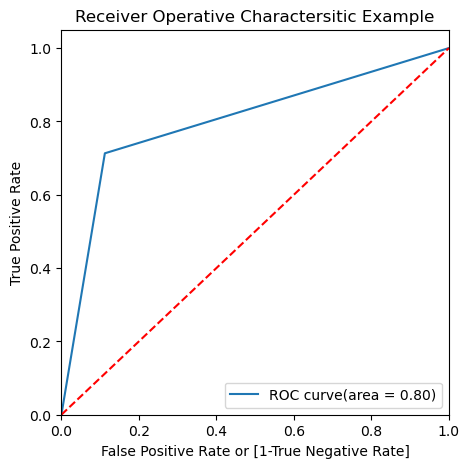

In [256]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

In [ ]:
#Since we have 0.80 under ROC curve our model looks good.

In [260]:
#Finding optimal Cuttoff point where we get a balanced specificity and sensitivity.
#Lets create columns with diff cutt off probabilities

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] =   y_train_pred_final.converted_prb.map(lambda x: 1 if x >i else 0)
    


In [261]:
 y_train_pred_final.head()

,Converted,converted_prb,prospect_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.198186,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.093761,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.340206,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865134,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.813496,7987,1,1,1,1,1,1,1,1,1,1,0


In [268]:
#Now lets calculate Accuracy, specificity and sentivity for various cutt offs

from sklearn.metrics import confusion_matrix

cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy','sensi','speci'])

TP = confusion [1,1]
TN = confusion [0,0]
FP = confusion [0,1]
FN = confusion [1,0]

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy,sensi,speci]


print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.595969  0.970155  0.361588
0.2   0.2  0.751220  0.916599  0.647631
0.3   0.3  0.802866  0.852412  0.771831
0.4   0.4  0.819241  0.779231  0.844302
0.5   0.5  0.820501  0.713001  0.887836
0.6   0.6  0.800504  0.607114  0.921639
0.7   0.7  0.786333  0.529027  0.947503
0.8   0.8  0.761612  0.426002  0.971831
0.9   0.9  0.721304  0.296811  0.987196


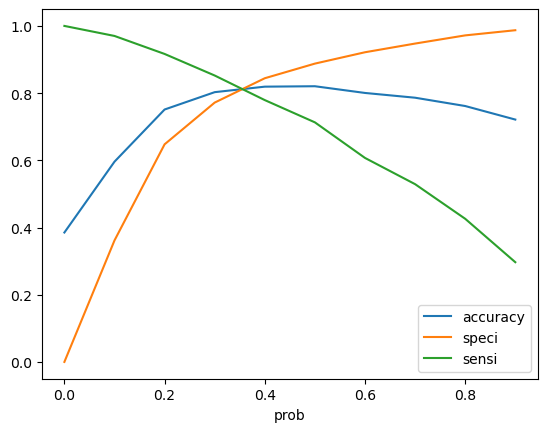

In [269]:
#Lets visualize it

cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi'])
plt.show()

In [ ]:
#From the above curve 0.34 looks looks like an optimum cut off

In [278]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prb.map(lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,converted_prb,prospect_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.198186,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.093761,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.340206,9226,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.865134,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.813496,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [279]:
#Assigning the lead score to the training data set

y_train_pred_final['Lead_Score'] = y_train_pred_final.converted_prb.map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,converted_prb,prospect_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.198186,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.093761,1012,0,1,0,0,0,0,0,0,0,0,0,0,9
2,0,0.340206,9226,0,1,1,1,1,0,0,0,0,0,0,1,34
3,1,0.865134,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.813496,7987,1,1,1,1,1,1,1,1,1,1,0,1,81


In [282]:
#Model Evaluation
#Lets check the overall Accuracy

print('Accuracy:', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))


Accuracy: 0.8116831994961423


In [283]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3143  762]
 [ 434 2012]]


In [284]:
TP = confusion [1,1]
TN = confusion [0,0]
FP = confusion [0,1]
FN = confusion [1,0]

In [285]:
#Lets see Sensitivity and specificity

print('Sensitivity:', TP/float(TP+FN))
print('specificity:', TN/float(TN+FP))

Sensitivity: 0.8225674570727719
specificity: 0.804865556978233


In [286]:
# Lets also calculate the false positive, positive predict and negative predict values as well

print('False Positive Rate::', FP/float(TN+FP))
print('Positive Predictive Rate:', TP/float(TP+FP))
print('Negative Predictive Rate::', TN/float(TN+FN))

False Positive Rate:: 0.19513444302176697
Positive Predictive Rate: 0.7253064167267483
Negative Predictive Rate:: 0.8786692759295499


In [271]:
print('Accuracy:', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


Accuracy: 0.8205007085498347


In [274]:
#Confusion Matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion2

array([[3467,  438],
       [ 702, 1744]], dtype=int64)

In [276]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [277]:
print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))

Sensitivity: 0.7130008176614882
Specificity: 0.8878361075544174


In [206]:
#Checking Precision and recall score

#Precision
TP/TP+FP

#Recall
TP/TP+FN

print("Precision:", confusion[1,1]/(confusion[0,1]+confusion[1,1]))
print("Recall:", confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision: 0.7992667277726856
Recall: 0.7130008176614882


In [207]:
#Importing Precision recall curve for training set
#Importing sklearn for precision and recall

from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print("Recall:", recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision: 0.7992667277726856
Recall: 0.7130008176614882


In [208]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [209]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.predicted)  #P stands for precison and r stands for recall

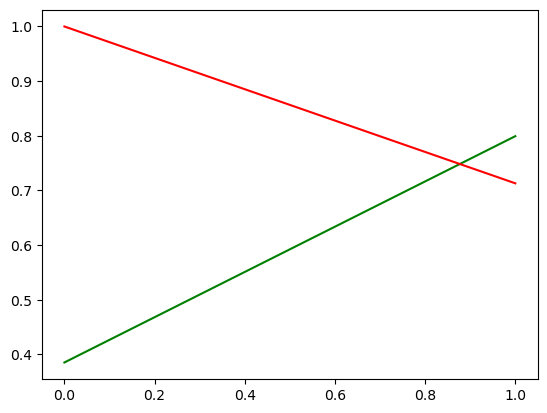

In [210]:
#Plotting the tradeoff curve between precision and recall

plt.plot(thresholds, p[ :-1], 'g-')
plt.plot(thresholds, r[ :-1], 'r-')
plt.show()

In [211]:
X_test[['totalvisits', 'total_time_spent_on_website','page_views_per_visit']] = Scaler.transform(X_test[['totalvisits', 'total_time_spent_on_website','page_views_per_visit']])

In [212]:
#Assigning columns selected by final model to the X_test

X_test = X_test[cols1]
X_test.head()

,do_not_email,total_time_spent_on_website,lead_origin_Landing Page Submission,lead_origin_Lead Import,lead_source_Olark Chat,lead_source_Reference,lead_source_Welingak Website,last_activity_Email Opened,last_activity_Olark Chat Conversation,last_activity_Other_Activity,last_activity_SMS Sent,last_activity_Unsubscribed,specialization_Others,what_is_your_current_occupation_Student,what_is_your_current_occupation_Working Professional,last_notable_activity_Modified,last_notable_activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1490,0,1.887326,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4216,0,-0.888650,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
3830,0,-0.587751,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [213]:
#Adding a const and making predictions on test set

X_test_sm = sm.add_constant(X_test)
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.129408
1490    0.970279
7936    0.111580
4216    0.871991
3830    0.133462
1800    0.638405
6507    0.336017
4821    0.305958
4223    0.915022
4714    0.340206
dtype: float64

In [214]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.129408
1490    0.970279
7936    0.111580
4216    0.871991
3830    0.133462
1800    0.638405
6507    0.336017
4821    0.305958
4223    0.915022
4714    0.340206
dtype: float64

In [216]:
#Converting Y test pred to a dataframe

y_pred1 = pd.DataFrame(y_test_pred)
y_pred1.head()

,0
3271,0.129408
1490,0.970279
7936,0.111580
4216,0.871991
3830,0.133462


In [217]:
#Converting y_test into dataframe


y_testdf = pd.DataFrame(y_test)
y_testdf.head()

,converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [218]:
#putting prospect id as index
y_testdf['prospectid'] = y_testdf.index

In [221]:
#removing index for both the dataframes to append them side by side
#appending them

y_testdf.reset_index(drop=True, inplace=True)
y_pred1.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_testdf,y_pred1], axis=1)
y_pred_final.head()

,converted,prospectid,0
0,0,3271,0.129408
1,1,1490,0.970279
2,0,7936,0.111580
3,1,4216,0.871991
4,0,3830,0.133462


In [223]:
#Renaming column 0

y_pred_final = y_pred_final.rename(columns={0:'converted_prob'})

y_pred_final.head()

,converted,prospectid,converted_prob
0,0,3271,0.129408
1,1,1490,0.970279
2,0,7936,0.111580
3,1,4216,0.871991
4,0,3830,0.133462


In [224]:
y_pred_final['final_predicted'] = y_pred_final.converted_prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,converted,prospectid,converted_prob,final_predicted
0,0,3271,0.129408,0
1,1,1490,0.970279,1
2,0,7936,0.111580,0
3,1,4216,0.871991,1
4,0,3830,0.133462,0


In [227]:
#Lets check the overall accuracy

print("Accuracy:", metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted))

Accuracy: 0.8053617333822989


In [229]:
#Making the confusion metrics again

confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted)
confusion2

array([[1396,  338],
       [ 192,  797]], dtype=int64)

In [230]:
#Metrices beyond accuracy
TP = confusion2 [1,1]
TN = confusion2 [0,0]
FP = confusion2 [0,1]
FN = confusion2 [1,0]

In [231]:
#Lets check Sensitivity and Specificity

#Sentivity

print("Sensitivity:", TP/float(TP+FN))


#Specificity
print("Specificity:", TN/float(TN+FP))


Sensitivity: 0.8058645096056622
Specificity: 0.8050749711649365


In [232]:
#Assigning lead score to the test data

y_pred_final['Lead_Score'] = y_pred_final.converted_prob.map(lambda x: round(x*100))

y_pred_final.head()


,converted,prospectid,converted_prob,final_predicted,Lead_Score
0,0,3271,0.129408,0,13
1,1,1490,0.970279,1,97
2,0,7936,0.111580,0,11
3,1,4216,0.871991,1,87
4,0,3830,0.133462,0,13


In [ ]:
#Comaparing the data of TEst and Train Set
#Test Set

#1. Accuracy :    80.53
#2. Specificity:  80.50
#3. Sensitivity:  80.58

#Train Set

#1. Accuracy :    81.16
#2. Specificity:  80.40
#3. Sensitivity:  82.20

#Hence we reached the 80% mark which seems to be a good model

Finding the leads that should be called

In [287]:
hot_leads = y_pred_final.loc[y_pred_final['Lead_Score']>=85]
hot_leads

,converted,prospectid,converted_prob,final_predicted,Lead_Score
1,1,1490,0.970279,1,97
3,1,4216,0.871991,1,87
8,1,4223,0.915022,1,92
16,1,1946,0.921283,1,92
21,1,2461,0.992594,1,99
...,...,...,...,...,...
2694,1,1566,0.949480,1,95
2699,1,6461,0.959809,1,96
2703,1,5741,0.908300,1,91
2715,1,6299,0.870148,1,87


In [289]:
#So there are 369 leads to be called on priority
#The prospect id of customers who should be contact are as follows:

print("The prospect id of customers who should be contacted are:")

hot_leads_ids = hot_leads['prospectid'].values.reshape(-1)
hot_leads_ids

The prospect id of customers who should be contacted are:


array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049,
       1518, 4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947,
       4807,  446, 8372, 5805, 3758,  337, 1561, 5367,  737, 6423, 8286,
       7174, 4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297,
        200, 5490, 1995, 4498, 5797, 8687,  831, 7653,  572, 2018, 6743,
       3976, 5769, 1051, 1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292,
       6913, 1481,  785, 3265, 3285, 7433, 3858, 3810, 2009, 8106,  373,
       7417, 4179, 8568, 7268, 6784, 6754, 2960, 7753, 3983,  802, 8745,
       4717,  505, 8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157,
       7175, 1675, 6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793,
       4837, 2495,  822, 2378, 5075, 7699, 5638, 2342, 8077, 2727,  720,
       7489, 2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,
        174, 2674, 8065, 2095, 1568, 8597, 4865, 3535, 4708, 1304, 6066,
       6538, 5700, 1388, 5815, 7970, 7902, 5804, 78

In [291]:
#Lets find the important features of the model

result.params.sort_values(ascending=False)

lead_source_Welingak Website                            5.862318
lead_source_Reference                                   3.340833
what_is_your_current_occupation_Working Professional    2.617794
last_activity_Other_Activity                            2.412095
last_notable_activity_Unreachable                       1.810336
last_activity_SMS Sent                                  1.556734
last_activity_Unsubscribed                              1.551028
total_time_spent_on_website                             1.106489
lead_source_Olark Chat                                  1.101763
lead_origin_Lead Import                                 0.815578
what_is_your_current_occupation_Student                 0.431307
last_activity_Email Opened                              0.296079
const                                                  -0.366393
last_activity_Olark Chat Conversation                  -0.757250
last_notable_activity_Modified                         -0.799861
lead_origin_Landing Page 